In [2]:
import numpy as np     
import csv 
import copy 
import random
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
import sklearn
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

import warnings
warnings.filterwarnings("ignore")


In [2]:
###   Read Data   ###


D = read_csv('PBE.csv')
df = pd.DataFrame(D)
Index = df.Index[:]
Formula = df.Formula[:]
Phase = df.Phase[:]
Decomp_pbe = df.Decomp[:]
Gap_pbe = df.Gap[:]
SLME_pbe = df.SLME[:]
Comp_desc = pd.DataFrame(D, columns=['Cs', 'MA', 'FA', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'Cubic', 'Tetra', 'Ortho', 'Hex'])
Elem_desc = pd.DataFrame(D, columns=['Cubic', 'Tetra', 'Ortho', 'Hex', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
All_desc = pd.DataFrame(D, columns=['Cs', 'MA', 'FA', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'Cubic', 'Tetra', 'Ortho', 'Hex', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])


D = read_csv('PBEsol.csv')
df = pd.DataFrame(D)
Decomp_pbesol = df.Decomp[:]
Gap_pbesol = df.Gap[:]
SLME_pbesol = df.SLME[:]


D = read_csv('PBEd3.csv')
df = pd.DataFrame(D)
Decomp_pbed3 = df.Decomp[:]
Gap_pbed3 = df.Gap[:]
SLME_pbed3 = df.SLME[:]


D = read_csv('PBEsold3.csv')
df = pd.DataFrame(D)
Decomp_pbesold3 = df.Decomp[:]
Gap_pbesold3 = df.Gap[:]
SLME_pbesold3 = df.SLME[:]


D = read_csv('HSE.csv')
df = pd.DataFrame(D)
Decomp_hse = df.Decomp[:]
Gap_hse = df.Gap[:]
SLME_hse = df.SLME[:]



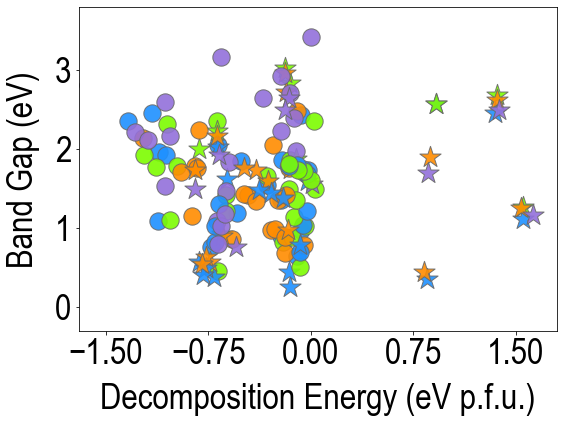

In [16]:
###   Visualize DFT Data, Decomp vs Gap    ###

n = len(df.Index[:])

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.14, bottom=0.21, right=0.97, top=0.96)
plt.rc('font', family='Arial Narrow')

# Decomp = Decomp_pbe
# Gap = Gap_pbe
# SLME = SLME_pbe

# Decomp = Decomp_pbesol
# Gap = Gap_pbesol
# SLME = SLME_pbesol

Decomp = Decomp_pbed3
Gap = Gap_pbed3
SLME = SLME_pbed3

# Decomp = Decomp_pbesold3
# Gap = Gap_pbesold3
# SLME = SLME_pbesold3

# Decomp = Decomp_hse
# Gap = Gap_hse
# SLME = SLME_hse


for i in range(0,n):

    if df.Cubic[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp[i], Gap[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp[i], Gap[i], c='dodgerblue', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
                
    if df.Tetra[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp[i], Gap[i], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp[i], Gap[i], c='lawngreen', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')            

    if df.Ortho[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp[i], Gap[i], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp[i], Gap[i], c='darkorange', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if df.Hex[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp[i], Gap[i], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp[i], Gap[i], c='mediumpurple', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
            
plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hex')
plt.scatter(1000, 1000, marker='o', s=200, facecolors='none', edgecolors='k', label='Hybrid')
plt.scatter(1000, 1000, marker='*', s=300, facecolors='none', edgecolors='k', label='Inorganic')

# a = [0.7,0.7,0.7]
# b = [-1000,0,1000]
# c = [0.5,0.5,0.5]
# d = [2.2,2.2,2.2]
# plt.plot(b, a, c='k', ls=':')
# plt.plot(b, d, c='k', ls=':')
# plt.plot(c, b, c='k', ls=':')
# x1 = np.arange(-1000, c[0],  0.01)
# plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.xlim([-1.7, 1.8])
plt.ylim([-0.3, 3.8])
plt.xticks([-1.5, -0.75, 0.0, 0.75, 1.5], fontsize=36)
#plt.xticks([-2.0, -1.0, 0.0, 1.0], fontsize=36)
plt.yticks([0.0, 1.0, 2.0, 3.0], fontsize=36)
plt.xlabel('Decomposition Energy (eV p.f.u.)', fontsize=36, labelpad=12)
plt.ylabel('Band Gap (eV)', fontsize=36, labelpad=15)
#plt.legend(loc='upper center', bbox_to_anchor=(0.50,1.08), ncol=3, frameon=True, framealpha=1.0, prop={'family':'Arial Narrow','size':20})
#plt.legend(loc='upper center', ncol=2, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('plot_decomp_gap.pdf', dpi=450)



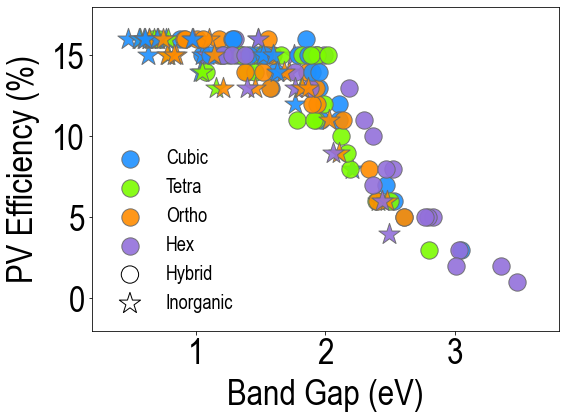

In [71]:
###   Visualize DFT Data, Gap vs SLME    ###

n = len(df.Index[:])

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.16, bottom=0.21, right=0.97, top=0.96)
plt.rc('font', family='Arial Narrow')

Decomp = Decomp_pbe
Gap = Gap_pbe
SLME = SLME_pbe

# Decomp = Decomp_pbesol
# Gap = Gap_pbesol
# SLME = SLME_pbesol

# Decomp = Decomp_pbed3
# Gap = Gap_pbed3
# SLME = SLME_pbed3

# Decomp = Decomp_pbesold3
# Gap = Gap_pbesold3
# SLME = SLME_pbesold3

# Decomp = Decomp_hse
# Gap = Gap_hse
# SLME = SLME_hse
# SLME[11] = 1000
# SLME[14] = 1000


for i in range(0,n):

    if df.Cubic[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap[i], SLME[i]*100, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap[i], SLME[i]*100, c='dodgerblue', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
                
    if df.Tetra[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap[i], SLME[i]*100, c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap[i], SLME[i]*100, c='lawngreen', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')            

    if df.Ortho[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap[i], SLME[i]*100, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap[i], SLME[i]*100, c='darkorange', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if df.Hex[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap[i], SLME[i]*100, c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap[i], SLME[i]*100, c='mediumpurple', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
            
plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='Hex')
plt.scatter(1000, 1000, marker='o', s=300, facecolors='none', edgecolors='k', label='Hybrid')
plt.scatter(1000, 1000, marker='*', s=500, facecolors='none', edgecolors='k', label='Inorganic')

# a = [0.7,0.7,0.7]
# b = [-1000,0,1000]
# c = [0.5,0.5,0.5]
# d = [2.2,2.2,2.2]
# plt.plot(b, a, c='k', ls=':')
# plt.plot(b, d, c='k', ls=':')
# plt.plot(c, b, c='k', ls=':')
# x1 = np.arange(-1000, c[0],  0.01)
# plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.ylim([-2, 18])
plt.xlim([0.2, 3.8])
plt.yticks([0, 5, 10, 15], fontsize=36)
plt.xticks([1.0, 2.0, 3.0], fontsize=36)
plt.ylabel('PV Efficiency (%)', fontsize=36, labelpad=12)
plt.xlabel('Band Gap (eV)', fontsize=36, labelpad=8)
plt.legend(loc='lower left', ncol=1, frameon=False, framealpha=1.0, prop={'family':'Arial Narrow','size':20})
plt.savefig('plot_gap_slme.pdf', dpi=450)



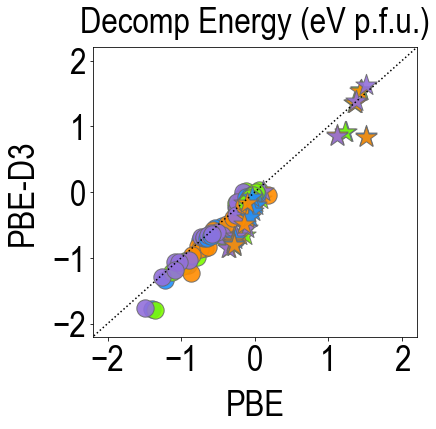

In [11]:
###   Visualize PBE vs PBEsol vs PBEd3 vs PBEsold3 vs HSE Decomp   ###

n = len(df.Index[:])

fig = plt.figure( figsize=(6,6) )
plt.subplots_adjust(left=0.22, bottom=0.21, right=0.97, top=0.88)
plt.rc('font', family='Arial Narrow')


for i in range(0,n):

    if df.Cubic[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='dodgerblue', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
                
    if df.Tetra[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='lawngreen', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')            

    if df.Ortho[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='darkorange', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if df.Hex[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Decomp_pbe[i], Decomp_pbed3[i], c='mediumpurple', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
            
plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hex')
plt.scatter(1000, 1000, marker='o', s=200, facecolors='none', edgecolors='k', label='Hybrid')
plt.scatter(1000, 1000, marker='*', s=300, facecolors='none', edgecolors='k', label='Inorganic')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([-2.2, 2.2])
plt.ylim([-2.2, 2.2])
plt.xticks([-2.0, -1.0, 0.0, 1.0, 2.0], fontsize=36)
plt.yticks([-2.0, -1.0, 0.0, 1.0, 2.0], fontsize=36)
plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBE-D3', fontsize=36, labelpad=12)
#plt.legend(loc='upper center', bbox_to_anchor=(0.50,1.08), ncol=3, frameon=True, framealpha=1.0, prop={'family':'Arial Narrow','size':20})
#plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':16})
plt.title('Decomp Energy (eV p.f.u.)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=15)
plt.savefig('plot_decomp_2.pdf', dpi=450)



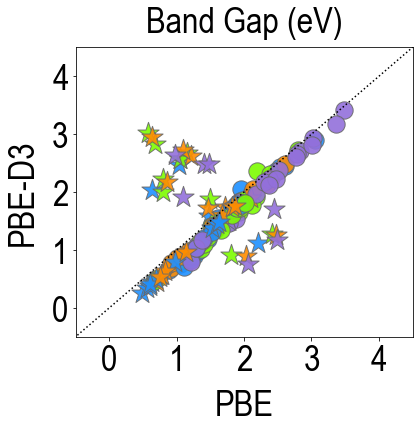

In [12]:
###   Visualize PBE vs PBEsol vs PBEd3 vs PBEsold3 vs HSE Gap   ###

n = len(df.Index[:])

fig = plt.figure( figsize=(6,6) )
plt.subplots_adjust(left=0.19, bottom=0.21, right=0.97, top=0.88)
plt.rc('font', family='Arial Narrow')


for i in range(0,n):

    if df.Cubic[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='dodgerblue', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
                
    if df.Tetra[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='lawngreen', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')            

    if df.Ortho[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='darkorange', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if df.Hex[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(Gap_pbe[i], Gap_pbed3[i], c='mediumpurple', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
            
plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hex')
plt.scatter(1000, 1000, marker='o', s=200, facecolors='none', edgecolors='k', label='Hybrid')
plt.scatter(1000, 1000, marker='*', s=300, facecolors='none', edgecolors='k', label='Inorganic')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([-0.5, 4.5])
plt.ylim([-0.5, 4.5])
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0], fontsize=36)
plt.yticks([0.0, 1.0, 2.0, 3.0, 4.0], fontsize=36)
plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBE-D3', fontsize=36, labelpad=12)
#plt.legend(loc='upper center', bbox_to_anchor=(0.50,1.08), ncol=3, frameon=True, framealpha=1.0, prop={'family':'Arial Narrow','size':20})
#plt.legend(loc='lower right', ncol=1, frameon=True, prop={'family':'Arial Narrow','size':18})
plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=15)
plt.savefig('plot_gap_2.pdf', dpi=450)



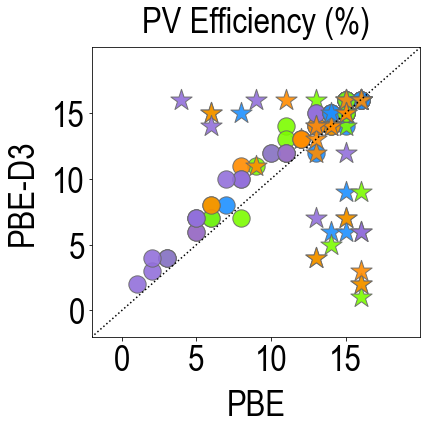

In [13]:
###   Visualize PBE vs PBEsol vs PBEd3 vs PBEsold3 vs HSE SLME   ###

n = len(df.Index[:])

fig = plt.figure( figsize=(6,6) )
plt.subplots_adjust(left=0.21, bottom=0.21, right=0.97, top=0.88)
plt.rc('font', family='Arial Narrow')


for i in range(0,n):

    if df.Cubic[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='dodgerblue', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
                
    if df.Tetra[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='lawngreen', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')            

    if df.Ortho[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='darkorange', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if df.Hex[i] == 1:
        if df.MA[i] > 0.0 or df.FA[i] > 0.0:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        else:
            plt.scatter(SLME_pbe[i]*100, SLME_pbed3[i]*100, c='mediumpurple', marker='*', s=500, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
            
plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hex')
plt.scatter(1000, 1000, marker='o', s=200, facecolors='none', edgecolors='k', label='Hybrid')
plt.scatter(1000, 1000, marker='*', s=300, facecolors='none', edgecolors='k', label='Inorganic')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([-2, 20])
plt.ylim([-2, 20])
plt.xticks([0, 5, 10, 15], fontsize=36)
plt.yticks([0, 5, 10, 15], fontsize=36)
plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBE-D3', fontsize=36, labelpad=12)
#plt.legend(loc='upper center', bbox_to_anchor=(0.50,1.08), ncol=3, frameon=True, framealpha=1.0, prop={'family':'Arial Narrow','size':20})
#plt.legend(loc='lower right', ncol=1, frameon=True, prop={'family':'Arial Narrow','size':18})
plt.title('PV Efficiency (%)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=15)
plt.savefig('plot_slme_2.pdf', dpi=450)



In [38]:
##  Function to generate elemental property descriptors, used for GA or any new compound  ##

def desc(Comp):
    
    !wget https://raw.githubusercontent.com/mannodiarun/mrs_spring_tutorial/perovs_dft_ml/Elem_prop.xlsx
    Data = pd.read_excel('Elem_prop.xlsx')
    
    Elem_desc = [0.0]*36
    for i in range(0,12):
        Elem_desc[i] = Data.K[i]*Comp[0] + Data.Rb[i]*Comp[1] + Data.Cs[i]*Comp[2] + Data.MA[i]*Comp[3] + Data.FA[i]*Comp[4]
        Elem_desc[i+12] = Data.Ca[i]*Comp[5] + Data.Sr[i]*Comp[6] + Data.Ba[i]*Comp[7] + Data.Ge[i]*Comp[8] + Data.Sn[i]*Comp[9] + Data.Pb[i]*Comp[10]
        Elem_desc[i+24] = Data.Cl[i]*Comp[11] + Data.Br[i]*Comp[12] + Data.I[i]*Comp[13]
    
    return(Elem_desc)



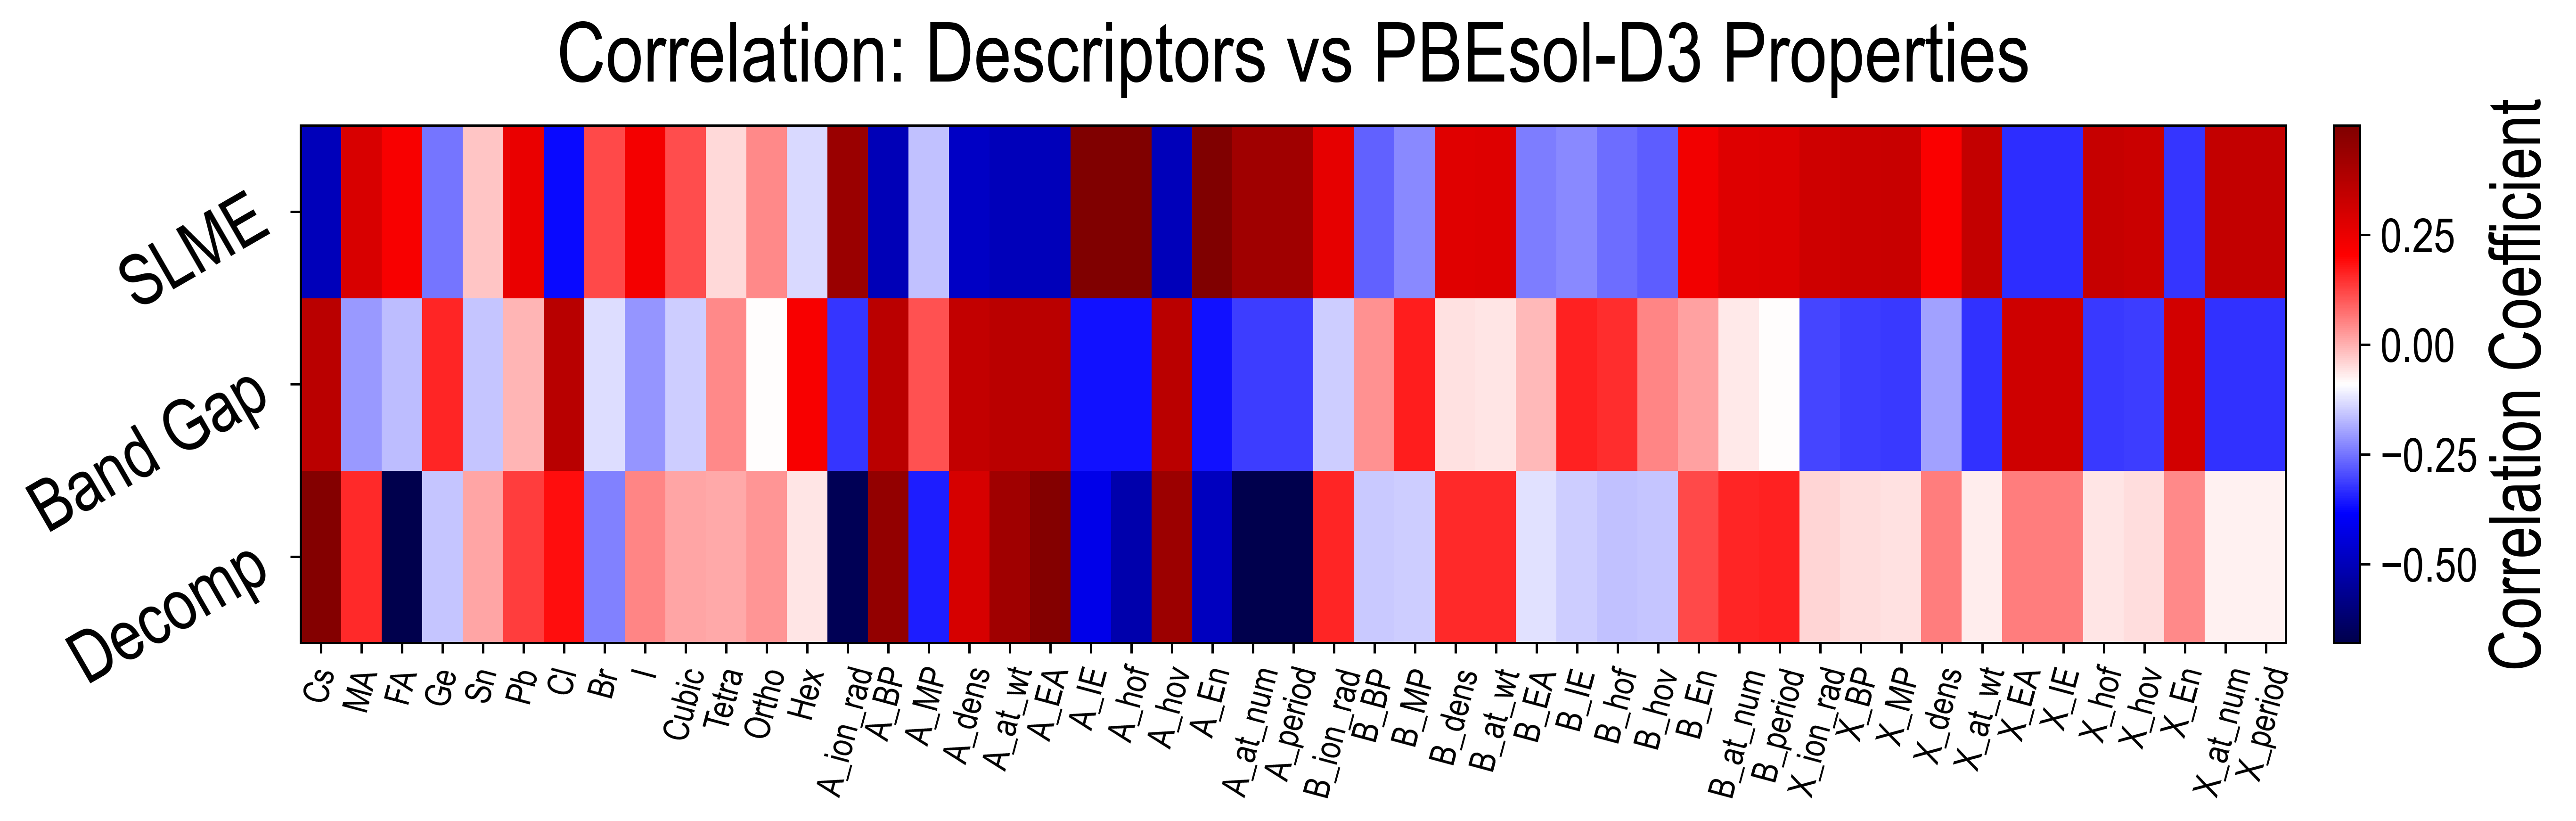

In [7]:
###   Pearson Coefficient of Linear Correlation    ###

# Decomp = Decomp_pbe
# Gap = Gap_pbe
# SLME = SLME_pbe

# Decomp = Decomp_pbesol
# Gap = Gap_pbesol
# SLME = SLME_pbesol

# Decomp = Decomp_pbed3
# Gap = Gap_pbed3
# SLME = SLME_pbed3

Decomp = Decomp_pbesold3
Gap = Gap_pbesold3
SLME = SLME_pbesold3

# Decomp = Decomp_hse
# Gap = Gap_hse
# SLME = SLME_hse


n = len(df.Index[:])
dim = int(All_desc.size/n)
X_fl = np.array(All_desc, dtype="float32")
Corr = [[0.0 for a in range(dim)] for b in range(3)]

for i in range(0,dim):
    x = stats.pearsonr(X_fl[:,i], Decomp[:])
    Corr[0][i] = x[0]
    x = stats.pearsonr(X_fl[:,i], Gap[:])
    Corr[1][i] = x[0]
    x = stats.pearsonr(X_fl[:,i], SLME[:])
    Corr[2][i] = x[0]

x = np.arange(dim)
xx = [0.0]*dim
for i in range(0,dim):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75
Prop = ['Decomp', 'Band Gap', 'SLME']


scale = ['linear']
plotposition = [131, 132, 133]

fig=plt.figure(figsize=(12,4),dpi=450)
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='Arial Narrow')
plt.subplots_adjust(left=0.12, right=1.06, top=0.85, bottom=0.24, wspace=0.2, hspace=0.2)

ax = plt.plot(plotposition[0])
plt.plot(plotposition[0])
plt.xscale(scale[0])
plt.yscale(scale[0])
plt.xlim([0,dim])
plt.ylim([0,3])

#Labels = ['Cs', 'MA', 'FA', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'Cubic', 'Tetra', 'Ortho', 'Hex']
#Labels = ['Cubic', 'Tetra', 'Ortho', 'Hex', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period']
Labels = ['Cs', 'MA', 'FA', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'Cubic', 'Tetra', 'Ortho', 'Hex', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period']

plt.xticks(xx[0:dim], Labels[0:dim], rotation=75, fontsize=12)
plt.yticks(y[:], Prop[:], rotation=30, fontsize=24)
plt.title('Correlation: Descriptors vs PBEsol-D3 Properties', fontname='Arial Narrow', size=28, horizontalalignment='center', pad=15)
plt.pcolor(Corr, cmap='seismic')
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(label='Correlation Coefficient', size=24)
plt.savefig('corr_pbesold3.pdf', dpi=450)



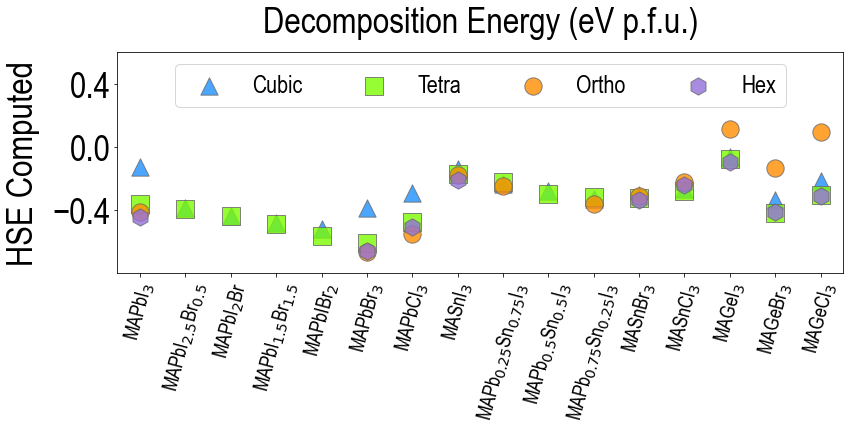

In [83]:
###   MA Compounds, Decomp   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 16

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.14, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.HSE_decomp_cub[0:n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.HSE_decomp_tet[0:n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.HSE_decomp_ort[0:n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.HSE_decomp_hex[0:n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')

Labels = Data.Formula[0:n]

plt.xlim([0, n])
plt.ylim([-0.8, 0.6])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([-0.4, 0, 0.4], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('HSE Computed', fontsize=36, labelpad=12)
plt.title('Decomposition Energy (eV p.f.u.)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=4, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.savefig('decomp_hse.pdf', dpi=450)



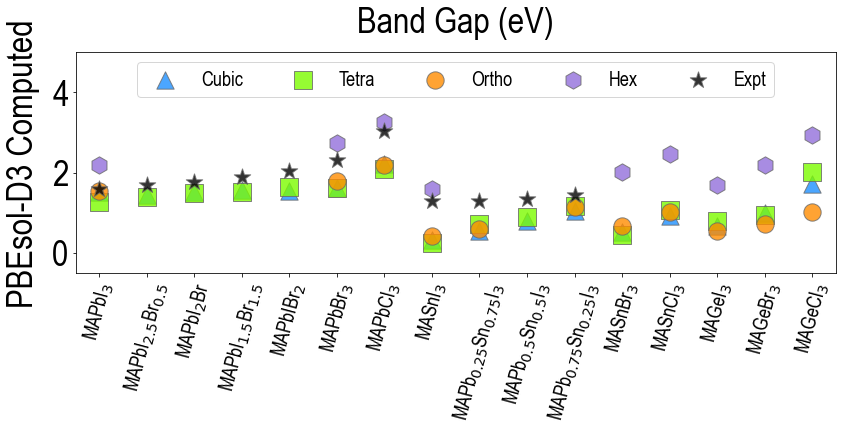

In [90]:
###   MA Compounds, Band Gap   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 16

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.10, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.PBEsold3_gap_cub[0:n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.PBEsold3_gap_tet[0:n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.PBEsold3_gap_ort[0:n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.PBEsold3_gap_hex[0:n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_gap[0:n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[0:n]

plt.xlim([0, n])
plt.ylim([-0.5, 5])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([0, 2, 4], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBEsol-D3 Computed', fontsize=36, labelpad=12)
plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('gap_pbesold3.pdf', dpi=450)



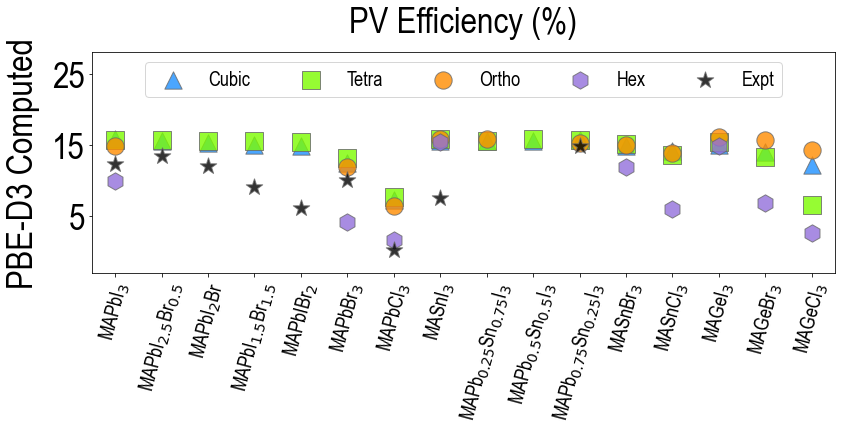

In [36]:
###   MA Compounds, SLME   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 16

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.12, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.PBEd3_slme_cub[0:n]*100, c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.PBEd3_slme_tet[0:n]*100, c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.PBEd3_slme_ort[0:n]*100, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.PBEd3_slme_hex[0:n]*100, c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_pce[0:n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[0:n]

plt.xlim([0, n])
plt.ylim([-3, 28])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([5, 15, 25], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBE-D3 Computed', fontsize=36, labelpad=12)
plt.title('PV Efficiency (%)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('slme_pbed3.pdf', dpi=450)



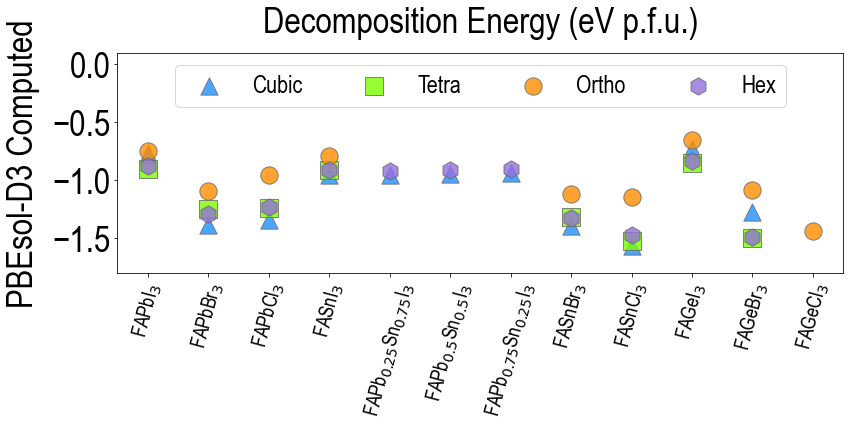

In [14]:
###   FA Compounds, Decomp   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 12

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.14, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.PBEsold3_decomp_cub[16:16+n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.PBEsold3_decomp_tet[16:16+n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.PBEsold3_decomp_ort[16:16+n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.PBEsold3_decomp_hex[16:16+n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')

Labels = Data.Formula[16:16+n]

plt.xlim([0, n])
plt.ylim([-1.8, 0.1])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([-1.5, -1.0, -0.5, 0.0], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBEsol-D3 Computed', fontsize=36, labelpad=12)
plt.title('Decomposition Energy (eV p.f.u.)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=4, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.savefig('decomp_pbesold3.pdf', dpi=450)



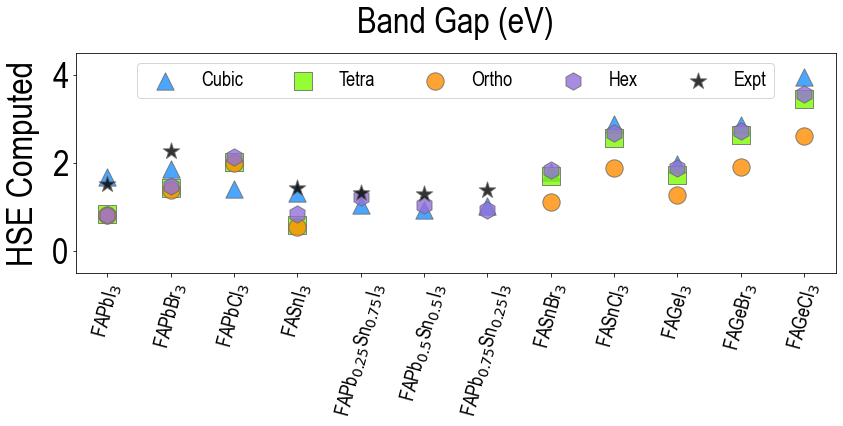

In [108]:
###   FA Compounds, Band Gap   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 12

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.10, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.HSE_gap_cub[16:16+n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.HSE_gap_tet[16:16+n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.HSE_gap_ort[16:16+n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.HSE_gap_hex[16:16+n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_gap[16:16+n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[16:16+n]

plt.xlim([0, n])
plt.ylim([-0.5, 4.5])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([0, 2, 4], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('HSE Computed', fontsize=36, labelpad=12)
plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('gap_hse.pdf', dpi=450)



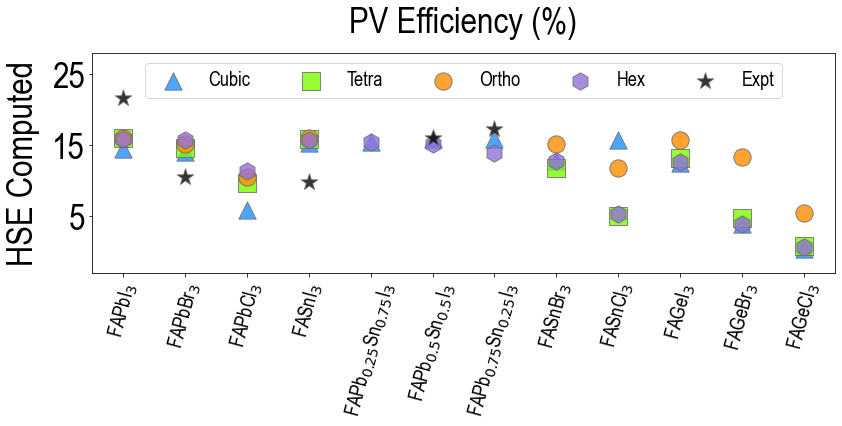

In [41]:
###   FA Compounds, SLME   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 12

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.12, bottom=0.35, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.HSE_slme_cub[16:16+n]*100, c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.HSE_slme_tet[16:16+n]*100, c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.HSE_slme_ort[16:16+n]*100, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.HSE_slme_hex[16:16+n]*100, c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_pce[16:16+n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[16:16+n]

plt.xlim([0, n])
plt.ylim([-3, 28])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([5, 15, 25], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('HSE Computed', fontsize=36, labelpad=12)
plt.title('PV Efficiency (%)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('slme_hse.pdf', dpi=450)



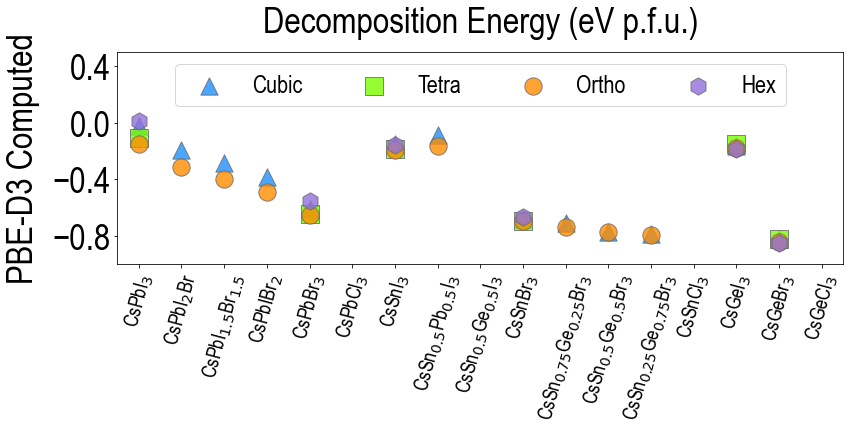

In [30]:
###   Cs Compounds, Decomp   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 17

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.14, bottom=0.37, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.PBEd3_decomp_cub[28:28+n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.PBEd3_decomp_tet[28:28+n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.PBEd3_decomp_ort[28:28+n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.PBEd3_decomp_hex[28:28+n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')

Labels = Data.Formula[28:28+n]

plt.xlim([0, n])
plt.ylim([-1.0, 0.5])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([-0.8, -0.4, 0.0, 0.4], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBE-D3 Computed', fontsize=36, labelpad=12)
plt.title('Decomposition Energy (eV p.f.u.)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=4, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.savefig('decomp_pbed3.pdf', dpi=450)



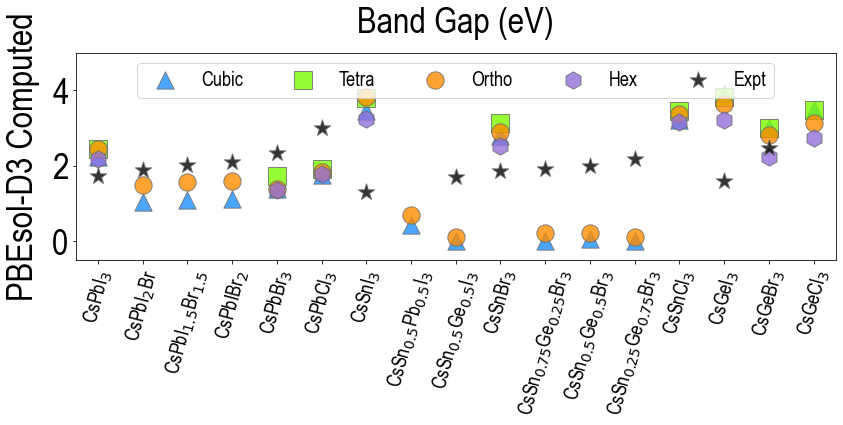

In [115]:
###   Cs Compounds, Band Gap   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 17

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.10, bottom=0.38, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.PBEsold3_gap_cub[28:28+n], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.PBEsold3_gap_tet[28:28+n], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.PBEsold3_gap_ort[28:28+n], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.PBEsold3_gap_hex[28:28+n], c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_gap[28:28+n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[28:28+n]

plt.xlim([0, n])
plt.ylim([-0.5, 5])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([0, 2, 4], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBEsol-D3 Computed', fontsize=36, labelpad=12)
plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('gap_pbesold3.pdf', dpi=450)



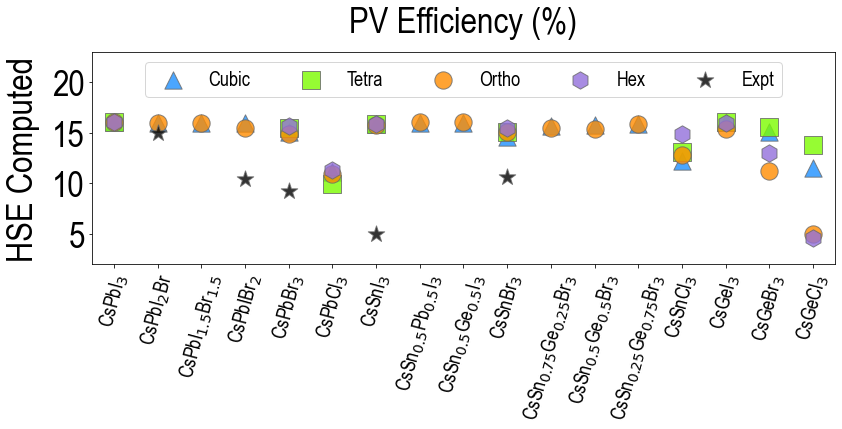

In [62]:
###   Cs Compounds, SLME   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

n = 17

fig = plt.figure( figsize=(12,6) )
plt.subplots_adjust(left=0.12, bottom=0.37, right=0.98, top=0.86)
plt.rc('font', family='Arial Narrow')

x = np.arange(n)
xx = [0.0]*n
for i in range(0,n):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75

plt.scatter(xx[:], Data.HSE_slme_cub[28:28+n]*100, c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='Cubic')
plt.scatter(xx[:], Data.HSE_slme_tet[28:28+n]*100, c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='Tetra')
plt.scatter(xx[:], Data.HSE_slme_ort[28:28+n]*100, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='Ortho')
plt.scatter(xx[:], Data.HSE_slme_hex[28:28+n]*100, c='mediumpurple', marker='h', s=300, edgecolors='dimgrey', alpha=0.8, label='Hex')
plt.scatter(xx[:], Data.Expt_pce[28:28+n], c='k', marker='*', s=300, edgecolors='dimgrey', alpha=0.8, label='Expt')

Labels = Data.Formula[28:28+n]

plt.xlim([0, n])
plt.ylim([2, 23])
plt.xticks(xx[:], Labels[:], rotation=75, fontsize=20)
plt.yticks([5, 10, 15, 20], fontsize=36)
#plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('HSE Computed', fontsize=36, labelpad=12)
plt.title('PV Efficiency (%)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper center', ncol=5, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('slme_hse.pdf', dpi=450)



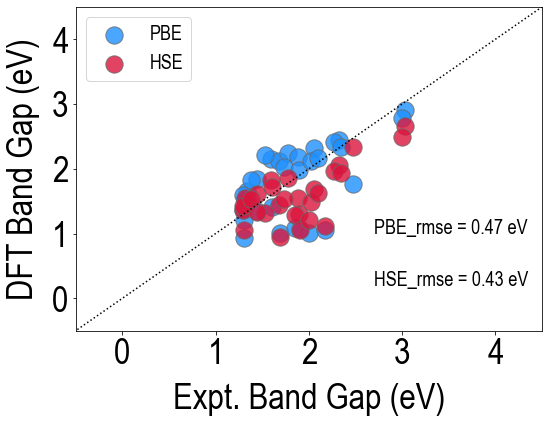

In [36]:
###      ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.96, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])
k = 0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        k=k+1

Expt_gap = [0.0]*k
HSE_gap = [0.0]*k
PBE_gap = [0.0]*k
PBEsol_gap = [0.0]*k
PBEd3_gap = [0.0]*k
PBEsold3_gap = [0.0]*k

j=0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        Expt_gap[j] = Data.Expt_gap[i]

        decomps = [Data.HSE_decomp_cub[i], Data.HSE_decomp_tet[i], Data.HSE_decomp_ort[i], Data.HSE_decomp_hex[i]]
        gaps = [Data.HSE_gap_cub[i], Data.HSE_gap_tet[i], Data.HSE_gap_ort[i], Data.HSE_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        HSE_gap[j] = gaps[np.argmin(decomps)] + 0.5

        decomps = [Data.PBE_decomp_cub[i], Data.PBE_decomp_tet[i], Data.PBE_decomp_ort[i], Data.PBE_decomp_hex[i]]
        gaps = [Data.PBE_gap_cub[i], Data.PBE_gap_tet[i], Data.PBE_gap_ort[i], Data.PBE_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBE_gap[j] = gaps[np.argmin(decomps)] + 0.3

        decomps = [Data.PBEsol_decomp_cub[i], Data.PBEsol_decomp_tet[i], Data.PBEsol_decomp_ort[i], Data.PBEsol_decomp_hex[i]]
        gaps = [Data.PBEsol_gap_cub[i], Data.PBEsol_gap_tet[i], Data.PBEsol_gap_ort[i], Data.PBEsol_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBEsol_gap[j] = gaps[np.argmin(decomps)]

        decomps = [Data.PBEd3_decomp_cub[i], Data.PBEd3_decomp_tet[i], Data.PBEd3_decomp_ort[i], Data.PBEd3_decomp_hex[i]]
        gaps = [Data.PBEd3_gap_cub[i], Data.PBEd3_gap_tet[i], Data.PBEd3_gap_ort[i], Data.PBEd3_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBEd3_gap[j] = gaps[np.argmin(decomps)]

        decomps = [Data.PBEsold3_decomp_cub[i], Data.PBEsold3_decomp_tet[i], Data.PBEsold3_decomp_ort[i], Data.PBEsold3_decomp_hex[i]]
        gaps = [Data.PBEsold3_gap_cub[i], Data.PBEsold3_gap_tet[i], Data.PBEsold3_gap_ort[i], Data.PBEsold3_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBEsold3_gap[j] = gaps[np.argmin(decomps)]    

        j=j+1

rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBE_gap) )
rmse_pbesol = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBEsol_gap) )
rmse_pbed3 = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBEd3_gap) )
rmse_pbesold3 = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBEsold3_gap) )
rmse_hse = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, HSE_gap) )
t1 = '%.2f' % rmse_pbe
t2 = '%.2f' % rmse_pbesol
t3 = '%.2f' % rmse_pbed3
t4 = '%.2f' % rmse_pbesold3
t5 = '%.2f' % rmse_hse

plt.scatter(Expt_gap[:], PBE_gap[0:n], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE')
plt.scatter(Expt_gap[:], PBEsol_gap[0:n], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol')
plt.scatter(Expt_gap[:], PBEd3_gap[0:n], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE-D3')
plt.scatter(Expt_gap[:], PBEsold3_gap[0:n], c='chocolate', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol-D3')
plt.scatter(Expt_gap[:], HSE_gap[0:n], c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='HSE')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([-0.5, 4.5])
plt.ylim([-0.5, 4.5])
plt.xticks([0, 1, 2, 3, 4], fontsize=36)
plt.yticks([0, 1, 2, 3, 4], fontsize=36)
plt.text(2.7, 1.0, 'PBE_rmse = ' + t1 + ' eV', c='k', fontsize=16)
plt.text(2.7, 0.7, 'PBEsol_rmse = ' + t2 + ' eV', c='k', fontsize=16)
plt.text(2.7, 0.4, 'PBE-D3_rmse = ' + t3 + ' eV', c='k', fontsize=16)
plt.text(2.7, 0.1, 'PBEsol-D3_rmse = ' + t4 + ' eV', c='k', fontsize=16)
plt.text(2.7, -0.2, 'HSE_rmse = ' + t5 + ' eV', c='k', fontsize=16)
plt.xlabel('Expt. Band Gap (eV)', fontsize=36, labelpad=12)
plt.ylabel('DFT Band Gap (eV)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft.pdf', dpi=450)



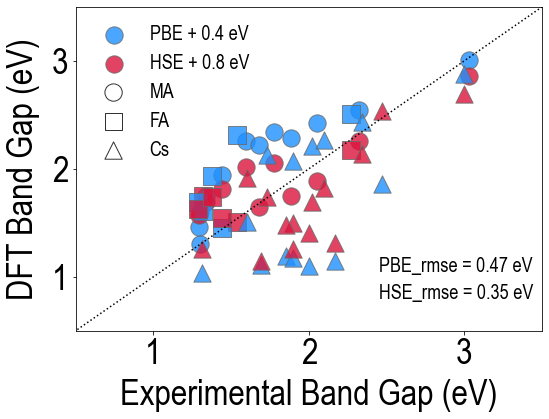

In [23]:
###      ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.96, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])
k = 0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        k=k+1

Expt_gap = [0.0]*k
HSE_gap = [0.0]*k
PBE_gap = [0.0]*k
A = ['s']*k


j=0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        Expt_gap[j] = Data.Expt_gap[i]

        decomps = [Data.HSE_decomp_cub[i], Data.HSE_decomp_tet[i], Data.HSE_decomp_ort[i], Data.HSE_decomp_hex[i]]
        gaps = [Data.HSE_gap_cub[i], Data.HSE_gap_tet[i], Data.HSE_gap_ort[i], Data.HSE_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
            A[j] = 'MA'
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
            A[j] = 'FA'
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
            A[j] = 'Cs'
        HSE_gap[j] = gaps[np.argmin(decomps)] + 0.7

        decomps = [Data.PBE_decomp_cub[i], Data.PBE_decomp_tet[i], Data.PBE_decomp_ort[i], Data.PBE_decomp_hex[i]]
        gaps = [Data.PBE_gap_cub[i], Data.PBE_gap_tet[i], Data.PBE_gap_ort[i], Data.PBE_gap_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBE_gap[j] = gaps[np.argmin(decomps)] + 0.4

        j=j+1

rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBE_gap) )
rmse_hse = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, HSE_gap) )
t1 = '%.2f' % rmse_pbe
t5 = '%.2f' % rmse_hse

for i in range(0,k):
    if A[i] == 'MA':
        plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    if A[i] == 'FA':
        plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    if A[i] == 'Cs':
        plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE + 0.4 eV')
plt.scatter(1000, 1000, c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='HSE + 0.8 eV')
plt.scatter(1000, 1000, marker='o', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='MA')
plt.scatter(1000, 1000, marker='s', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='FA')
plt.scatter(1000, 1000, marker='^', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='Cs')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([0.5, 3.5])
plt.ylim([0.5, 3.5])
plt.xticks([1, 2, 3], fontsize=36)
plt.yticks([1, 2, 3], fontsize=36)
plt.text(2.45, 1.05, 'PBE_rmse = ' + t1 + ' eV', c='k', fontsize=20)
plt.text(2.45, 0.80, 'HSE_rmse = ' + t5 + ' eV', c='k', fontsize=20)
plt.xlabel('Experimental Band Gap (eV)', fontsize=36, labelpad=8)
plt.ylabel('DFT Band Gap (eV)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft.pdf', dpi=450)



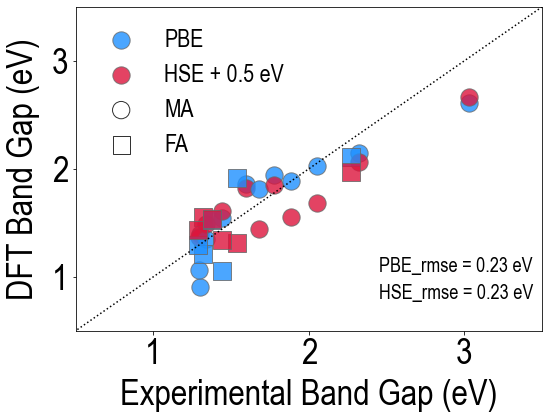

In [24]:
###      ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.96, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])
k = 0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        if Data.A[i] == 'MA' or Data.A[i] == 'FA':
            k=k+1

Expt_gap = [0.0]*k
HSE_gap = [0.0]*k
PBE_gap = [0.0]*k
A = ['s']*k


j=0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        if Data.A[i] == 'MA' or Data.A[i] == 'FA':
            Expt_gap[j] = Data.Expt_gap[i]
            
            decomps = [Data.HSE_decomp_cub[i], Data.HSE_decomp_tet[i], Data.HSE_decomp_ort[i], Data.HSE_decomp_hex[i]]
            gaps = [Data.HSE_gap_cub[i], Data.HSE_gap_tet[i], Data.HSE_gap_ort[i], Data.HSE_gap_hex[i]]
            if Data.A[i] == 'MA':
                decomps[3] = 1000
                A[j] = 'MA'
            if Data.A[i] == 'FA':
                decomps[1] = 1000
                decomps[2] = 1000
                A[j] = 'FA'
            HSE_gap[j] = gaps[np.argmin(decomps)] + 0.5
            
            decomps = [Data.PBE_decomp_cub[i], Data.PBE_decomp_tet[i], Data.PBE_decomp_ort[i], Data.PBE_decomp_hex[i]]
            gaps = [Data.PBE_gap_cub[i], Data.PBE_gap_tet[i], Data.PBE_gap_ort[i], Data.PBE_gap_hex[i]]
            if Data.A[i] == 'MA':
                decomps[3] = 1000
            if Data.A[i] == 'FA':
                decomps[1] = 1000
                decomps[2] = 1000
            PBE_gap[j] = gaps[np.argmin(decomps)]
            
            j=j+1

rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBE_gap) )
rmse_hse = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, HSE_gap) )
t1 = '%.2f' % rmse_pbe
t5 = '%.2f' % rmse_hse

for i in range(0,k):
    if A[i] == 'MA':
        plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    if A[i] == 'FA':
        plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE')
plt.scatter(1000, 1000, c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='HSE + 0.5 eV')
plt.scatter(1000, 1000, marker='o', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='MA')
plt.scatter(1000, 1000, marker='s', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='FA')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([0.5, 3.5])
plt.ylim([0.5, 3.5])
plt.xticks([1, 2, 3], fontsize=36)
plt.yticks([1, 2, 3], fontsize=36)
plt.text(2.45, 1.05, 'PBE_rmse = ' + t1 + ' eV', c='k', fontsize=20)
plt.text(2.45, 0.80, 'HSE_rmse = ' + t5 + ' eV', c='k', fontsize=20)
plt.xlabel('Experimental Band Gap (eV)', fontsize=36, labelpad=8)
plt.ylabel('DFT Band Gap (eV)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':24})
plt.savefig('expt_vs_dft.pdf', dpi=450)



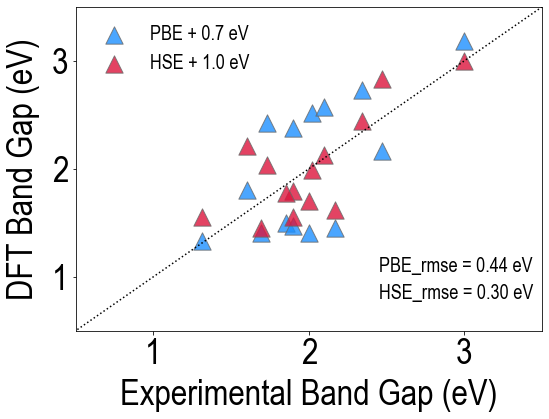

In [16]:
###      ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.96, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])
k = 0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        if Data.A[i] == 'Cs':
            k=k+1

Expt_gap = [0.0]*k
HSE_gap = [0.0]*k
PBE_gap = [0.0]*k
A = ['s']*k


j=0
for i in range(0,n):
    if Data.Expt_gap[i] < 900:
        if Data.A[i] == 'Cs':
            Expt_gap[j] = Data.Expt_gap[i]
            decomps = [Data.HSE_decomp_cub[i], Data.HSE_decomp_tet[i], Data.HSE_decomp_ort[i], Data.HSE_decomp_hex[i]]
            gaps = [Data.HSE_gap_cub[i], Data.HSE_gap_tet[i], Data.HSE_gap_ort[i], Data.HSE_gap_hex[i]]
            decomps[3] = 1000
            A[j] = 'Cs'
            HSE_gap[j] = gaps[np.argmin(decomps)] + 1.0
            
            decomps = [Data.PBE_decomp_cub[i], Data.PBE_decomp_tet[i], Data.PBE_decomp_ort[i], Data.PBE_decomp_hex[i]]
            gaps = [Data.PBE_gap_cub[i], Data.PBE_gap_tet[i], Data.PBE_gap_ort[i], Data.PBE_gap_hex[i]]
            decomps[3] = 1000
            PBE_gap[j] = gaps[np.argmin(decomps)] + 0.7
            
            j=j+1

rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, PBE_gap) )
rmse_hse = np.sqrt( sklearn.metrics.mean_squared_error(Expt_gap, HSE_gap) )
t1 = '%.2f' % rmse_pbe
t5 = '%.2f' % rmse_hse

for i in range(0,k):
    plt.scatter(Expt_gap[i], PBE_gap[i], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    plt.scatter(Expt_gap[i], HSE_gap[i], c='crimson', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')

plt.scatter(1000, 1000, c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE + 0.7 eV')
plt.scatter(1000, 1000, c='crimson', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='HSE + 1.0 eV')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([0.5, 3.5])
plt.ylim([0.5, 3.5])
plt.xticks([1, 2, 3], fontsize=36)
plt.yticks([1, 2, 3], fontsize=36)
plt.text(2.45, 1.05, 'PBE_rmse = ' + t1 + ' eV', c='k', fontsize=20)
plt.text(2.45, 0.80, 'HSE_rmse = ' + t5 + ' eV', c='k', fontsize=20)
plt.xlabel('Experimental Band Gap (eV)', fontsize=36, labelpad=8)
plt.ylabel('DFT Band Gap (eV)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft.pdf', dpi=450)



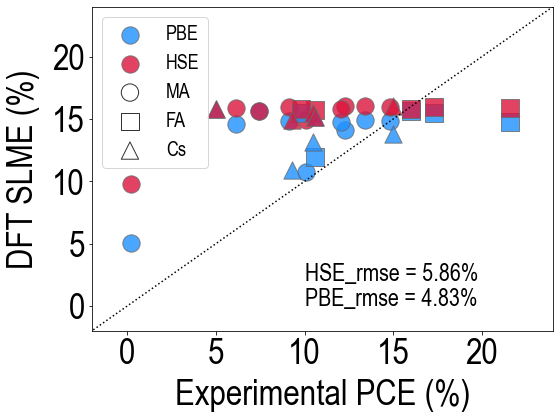

In [74]:
###      ###

Data = pd.read_excel('Compiled_data.xlsx', 'Sheet1')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.16, bottom=0.20, right=0.96, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])
k = 0
for i in range(0,n):
    if Data.Expt_pce[i] < 900:
        k=k+1

Expt_pce = [0.0]*k
HSE_slme = [0.0]*k
PBE_slme = [0.0]*k
A = ['s']*k


j=0
for i in range(0,n):
    if Data.Expt_pce[i] < 900:
        Expt_pce[j] = Data.Expt_pce[i]

        decomps = [Data.HSE_decomp_cub[i], Data.HSE_decomp_tet[i], Data.HSE_decomp_ort[i], Data.HSE_decomp_hex[i]]
        pce = [Data.HSE_slme_cub[i], Data.HSE_slme_tet[i], Data.HSE_slme_ort[i], Data.HSE_slme_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
            A[j] = 'MA'
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
            A[j] = 'FA'
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
            A[j] = 'Cs'
        HSE_slme[j] = pce[np.argmin(decomps)]*100

        decomps = [Data.PBE_decomp_cub[i], Data.PBE_decomp_tet[i], Data.PBE_decomp_ort[i], Data.PBE_decomp_hex[i]]
        pce = [Data.PBE_slme_cub[i], Data.PBE_slme_tet[i], Data.PBE_slme_ort[i], Data.PBE_slme_hex[i]]
        if Data.A[i] == 'MA':
            decomps[3] = 1000
        if Data.A[i] == 'FA':
            decomps[1] = 1000
            decomps[2] = 1000
        if Data.A[i] == 'Cs':
            decomps[3] = 1000
        PBE_slme[j] = pce[np.argmin(decomps)]*100

        j=j+1


rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Expt_pce, PBE_slme) )
rmse_hse = np.sqrt( sklearn.metrics.mean_squared_error(Expt_pce, HSE_slme) )
t1 = '%.2f' % rmse_pbe
t5 = '%.2f' % rmse_hse

for i in range(0,k):
    if A[i] == 'MA':
        plt.scatter(Expt_pce[i], PBE_slme[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_pce[i], HSE_slme[i], c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    if A[i] == 'FA':
        plt.scatter(Expt_pce[i], PBE_slme[i], c='dodgerblue', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_pce[i], HSE_slme[i], c='crimson', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
    if A[i] == 'Cs':
        plt.scatter(Expt_pce[i], PBE_slme[i], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')
        plt.scatter(Expt_pce[i], HSE_slme[i], c='crimson', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_')

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE')
plt.scatter(1000, 1000, c='crimson', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='HSE')
plt.scatter(1000, 1000, marker='o', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='MA')
plt.scatter(1000, 1000, marker='s', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='FA')
plt.scatter(1000, 1000, marker='^', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='Cs')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([-2, 24])
plt.ylim([-2, 24])
plt.xticks([0, 5, 10, 15, 20], fontsize=36)
plt.yticks([0, 5, 10, 15, 20], fontsize=36)
plt.text(10, 0, 'PBE_rmse = ' + t1 + '%', c='k', fontsize=24)
plt.text(10, 2, 'HSE_rmse = ' + t5 + '%', c='k', fontsize=24)
plt.xlabel('Experimental PCE (%)', fontsize=36, labelpad=8)
plt.ylabel('DFT SLME (%)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft.pdf', dpi=450)



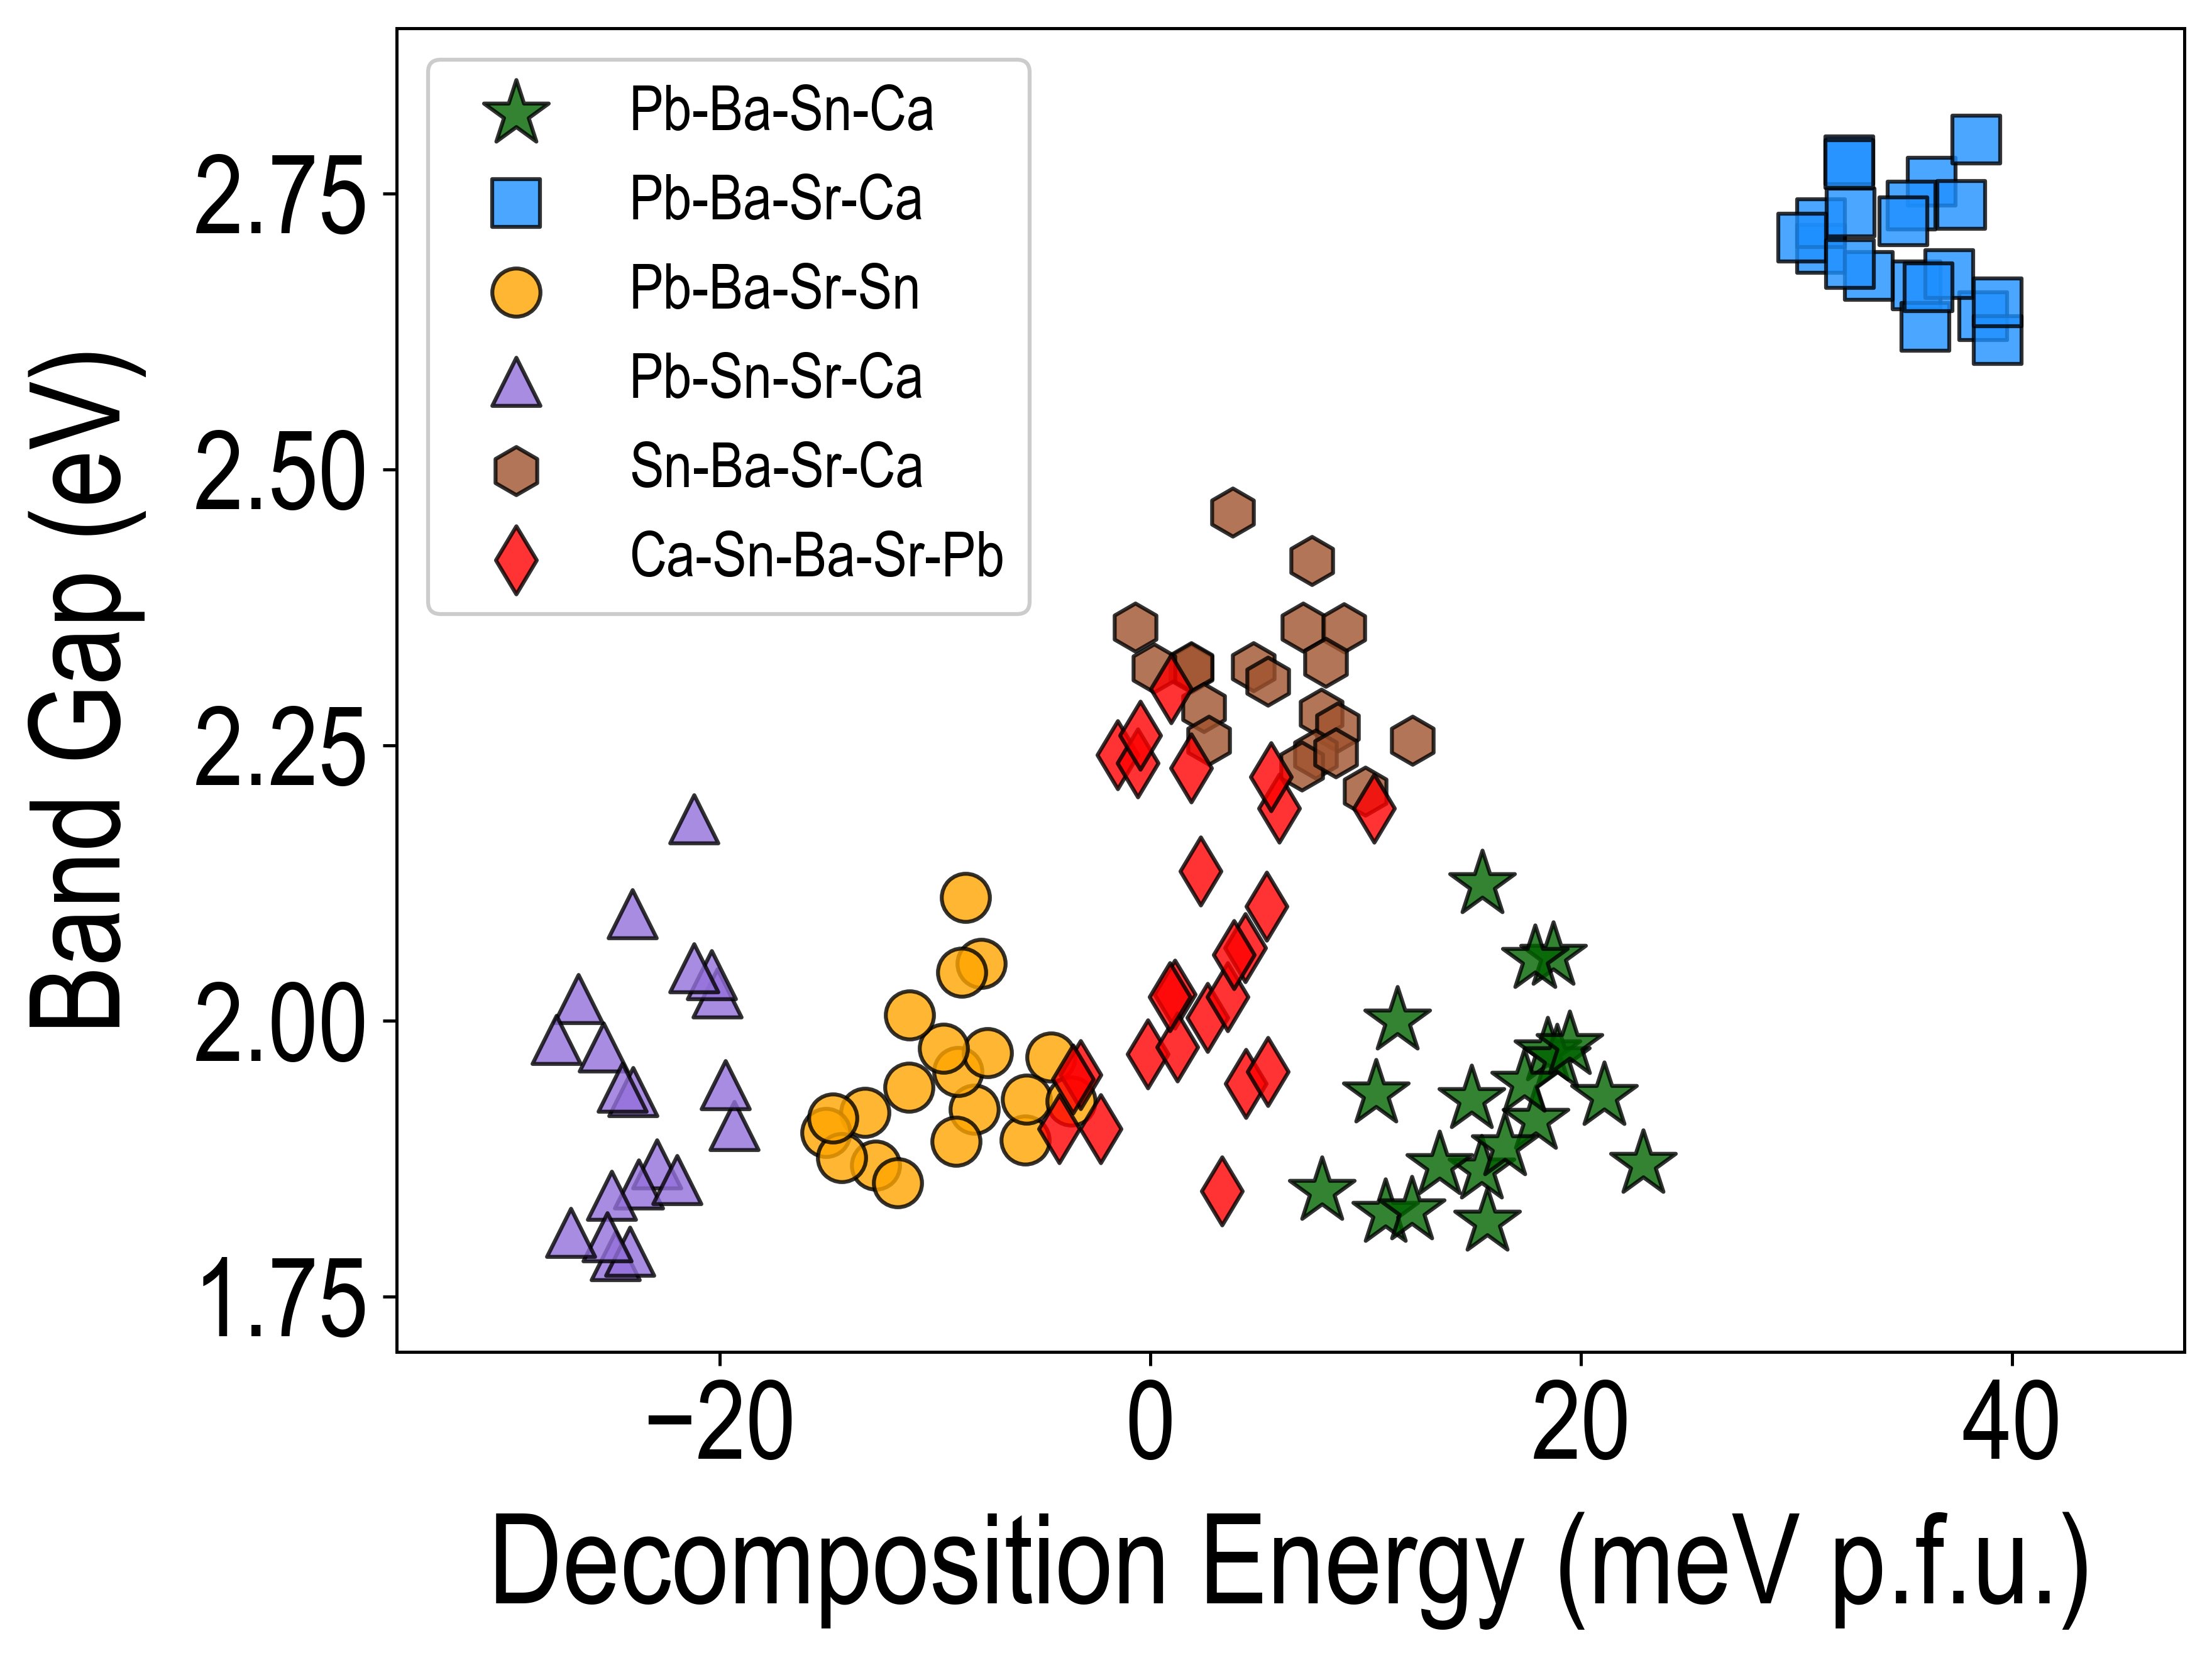

In [57]:
###    Plot larger supercell data    ###

Data = pd.read_excel('Compiled_data.xlsx', 'LS')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')


plt.scatter(Data.Decomp[0:20]*1000, Data.Gap[0:20], c='darkgreen', alpha=0.8, marker='*', s=300, edgecolor='k', label='Pb-Ba-Sn-Ca', zorder=1)
plt.scatter(Data.Decomp[20:40]*1000, Data.Gap[20:40], c='dodgerblue', alpha=0.8, marker='s', s=150, edgecolor='k', label='Pb-Ba-Sr-Ca', zorder=2)
plt.scatter(Data.Decomp[40:60]*1000, Data.Gap[40:60], c='orange', alpha=0.8, marker='o', s=150, edgecolor='k', label='Pb-Ba-Sr-Sn', zorder=3)
plt.scatter(Data.Decomp[60:80]*1000, Data.Gap[60:80], c='mediumpurple', alpha=0.8, marker='^', s=150, edgecolor='k', label='Pb-Sn-Sr-Ca', zorder=4)
plt.scatter(Data.Decomp[80:100]*1000, Data.Gap[80:100], c='sienna', alpha=0.8, marker='h', s=150, edgecolor='k', label='Sn-Ba-Sr-Ca', zorder=5)
plt.scatter(Data.Decomp[100:125]*1000, Data.Gap[100:125], c='r', alpha=0.8, marker='d', s=150, edgecolor='k', label='Ca-Sn-Ba-Sr-Pb', zorder=6)

#plt.scatter((Data_1.Delta_H_mix[:]+Data_1.Entr_contr[:])*1000, Data_1.Gap[:], c='darkgreen', alpha=0.8, marker='*', s=300, edgecolor='k', label='MAPb$_{0.2}$Sn$_{0.2}$Ba$_{0.2}$Sr$_{0.2}$Ca$_{0.2}$I$_{3}$', zorder=1)
#plt.scatter((Data_2.Delta_H_mix[:]+Data_2.Entr_contr[:])*1000, Data_2.Gap[:], c='dodgerblue', alpha=0.8, marker='s', s=150, edgecolor='k', label='MAPb$_{0.25}$Ba$_{0.25}$Sr$_{0.25}$Ca$_{0.25}$I$_{3}$', zorder=2)
#plt.scatter((Data_3.Delta_H_mix[:]+Data_3.Entr_contr[:])*1000, Data_3.Gap[:], c='orange', alpha=0.8, marker='o', s=150, edgecolor='k', label='MAPb$_{0.25}$Sn$_{0.25}$Ba$_{0.25}$Ca$_{0.25}$I$_{3}$', zorder=3)
#plt.scatter((Data_4.Delta_H_mix[:]+Data_4.Entr_contr[:])*1000, Data_4.Gap[:], c='mediumpurple', alpha=0.8, marker='^', s=150, edgecolor='k', label='MAPb$_{0.25}$Sn$_{0.25}$Ba$_{0.25}$Sr$_{0.25}$I$_{3}$', zorder=4)
#plt.scatter((Data_5.Delta_H_mix[:]+Data_5.Entr_contr[:])*1000, Data_5.Gap[:], c='sienna', alpha=0.8, marker='h', s=150, edgecolor='k', label='MAPb$_{0.25}$Sn$_{0.25}$Sr$_{0.25}$Ca$_{0.25}$I$_{3}$', zorder=5)
#plt.scatter((Data_6.Delta_H_mix[:]+Data_6.Entr_contr[:])*1000, Data_6.Gap[:], c='r', alpha=0.8, marker='d', s=150, edgecolor='k', label='MASn$_{0.25}$Ba$_{0.25}$Sr$_{0.25}$Ca$_{0.25}$I$_{3}$', zorder=6)


#aa = [-1000, 0, 1000]
#bb = [-1000, 0, 1000]
#plt.plot(aa, bb, c='darkgrey', ls=':', label='_nolegend_')


plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

plt.xlabel('Decomposition Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
#plt.xlabel('Mixing Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.ylabel('Band Gap (eV)', c='k', fontname='Arial Narrow', size=32, labelpad=12)

plt.xlim([-35, 48])
#plt.xlim([-5, 35])
plt.ylim([1.7, 2.9])
plt.xticks([-20, 0, 20, 40])
plt.yticks([1.75, 2.00, 2.25, 2.50, 2.75])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

plt.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_ls.pdf', dpi=450)



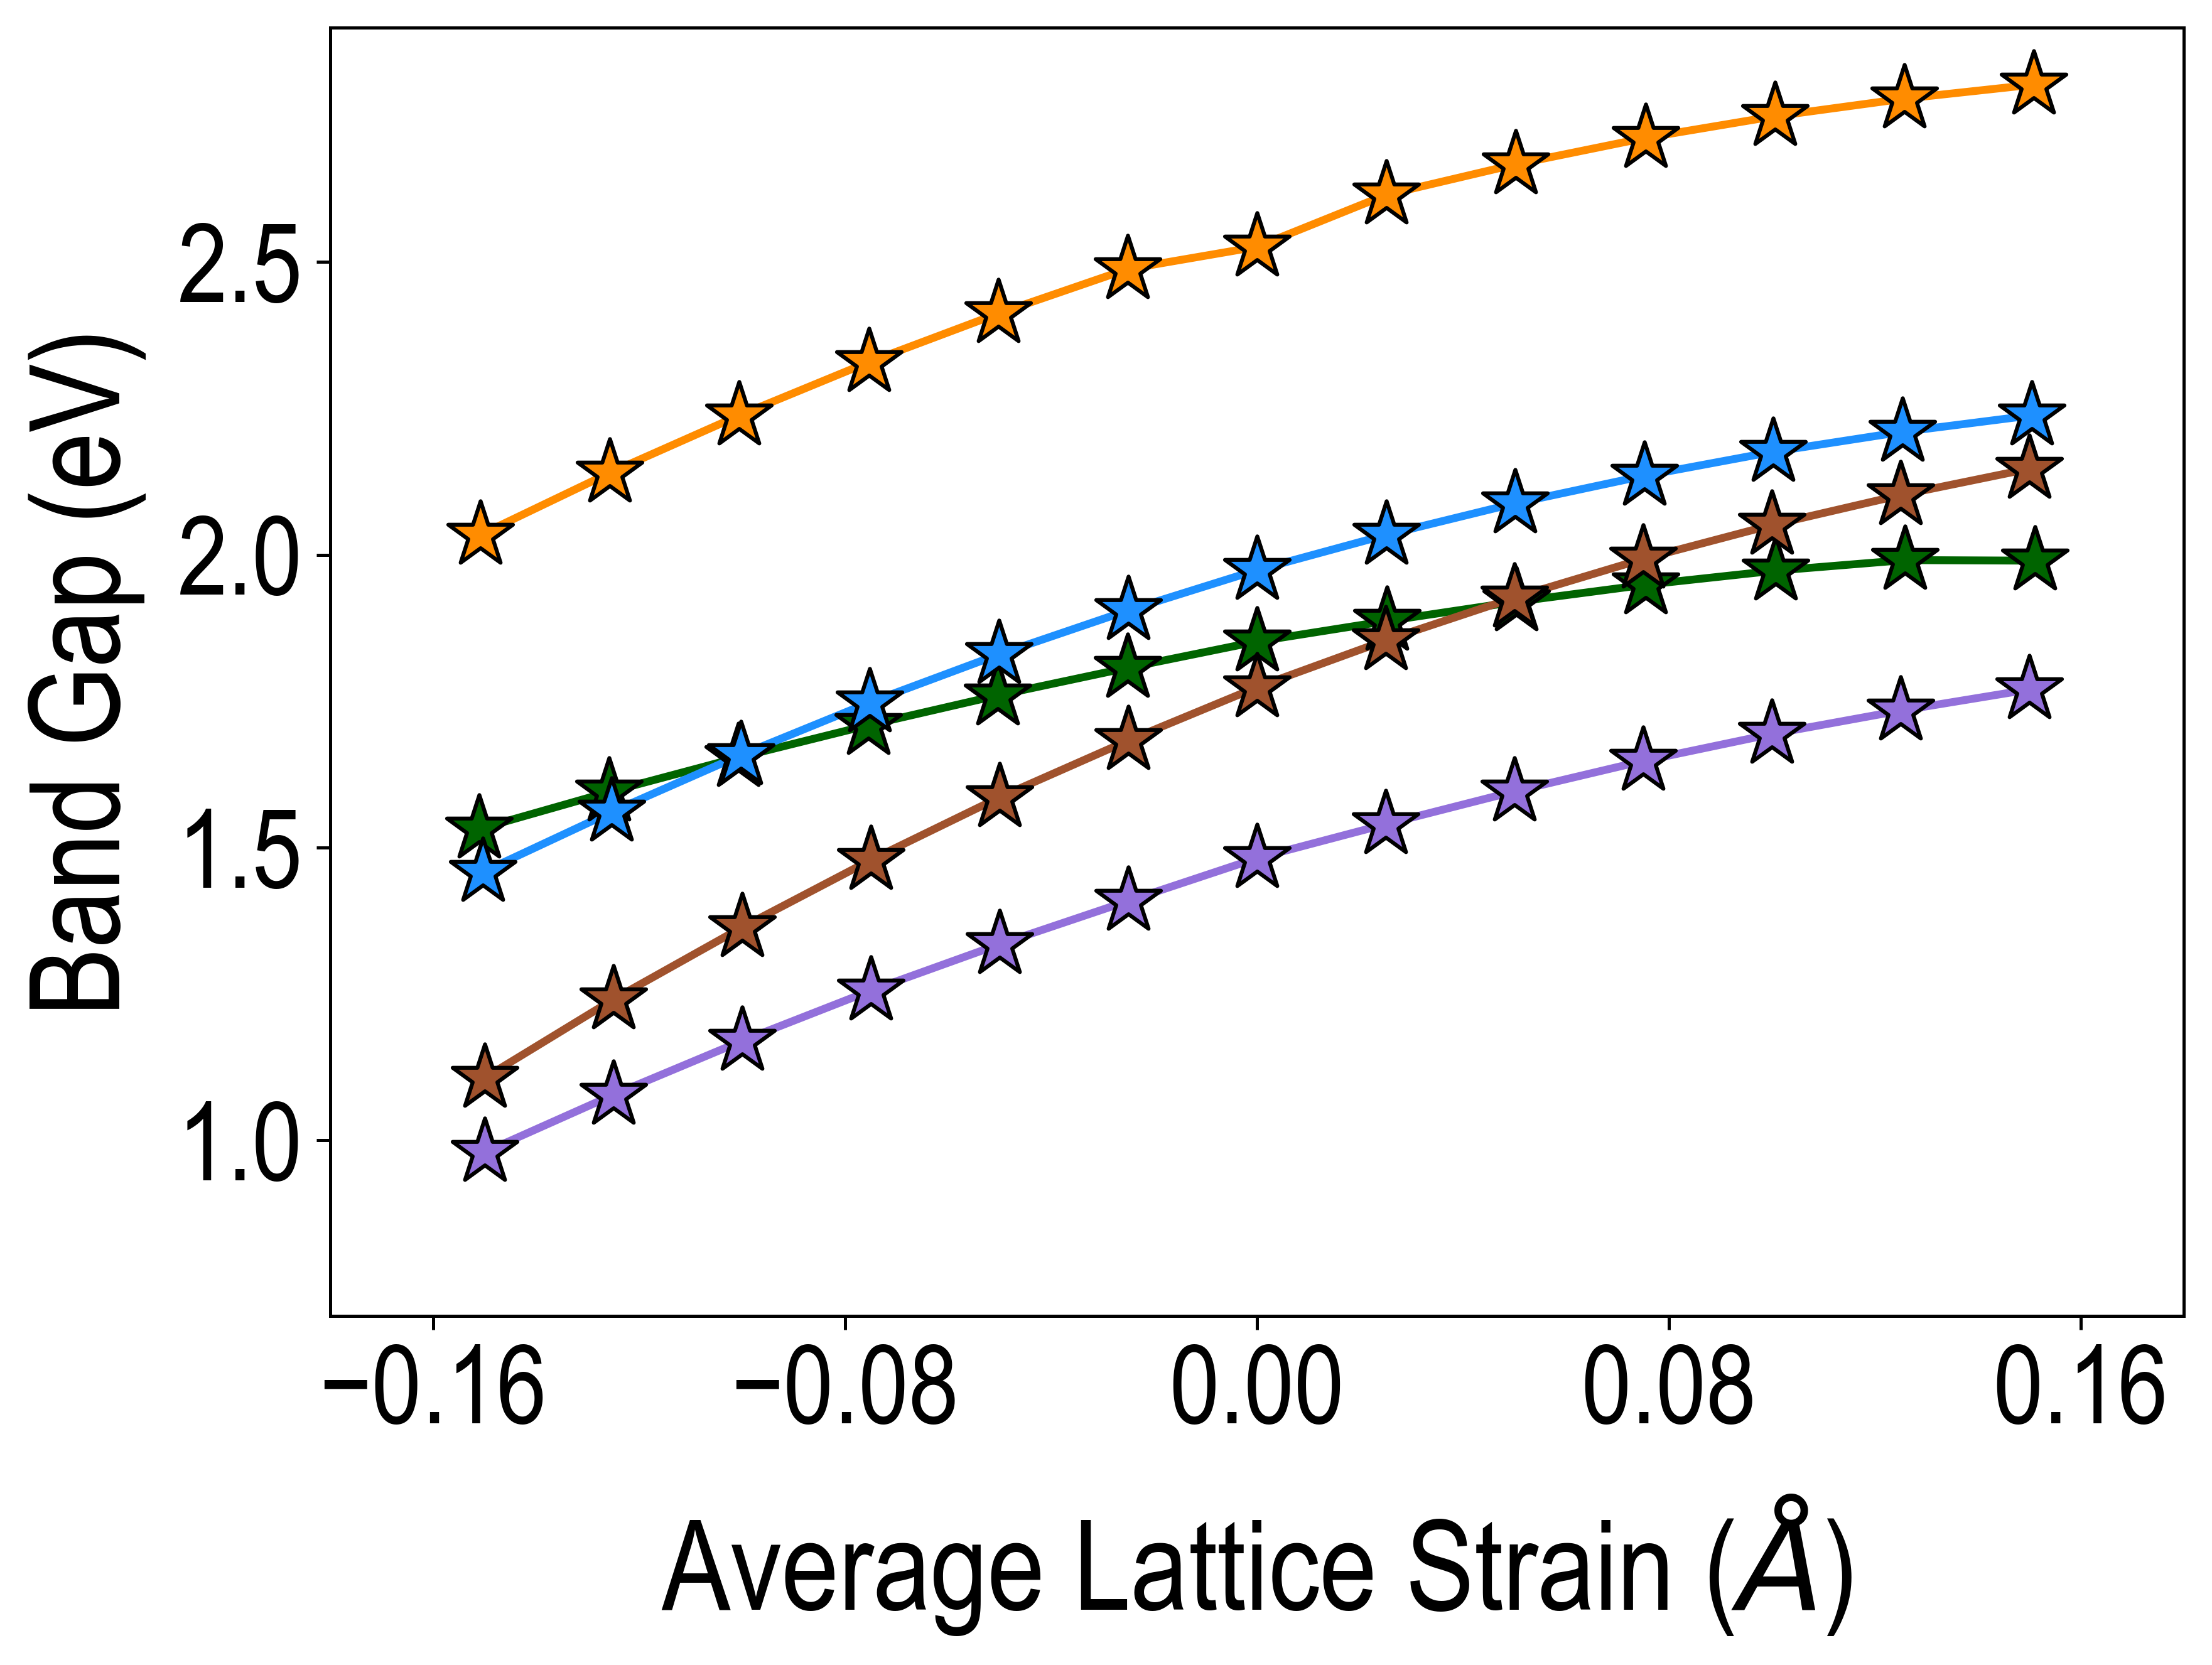

In [4]:
###    Lattice strain vs band gap    ###

Data = pd.read_excel('Compiled_data.xlsx', 'Latt_dist')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(Data.MAPI_dist[:], Data.MAPI_gap[:], c='darkgreen', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPI_dist[:], Data.MAPI_gap[:], ls='-', lw=2, c='darkgreen', label='MAPbI$_{3}$', zorder=1)

plt.scatter(Data.MAPBr_dist[:], Data.MAPBr_gap[:], c='dodgerblue', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPBr_dist[:], Data.MAPBr_gap[:], ls='-', lw=2, c='dodgerblue', label='MAPbBr$_{3}$', zorder=1)

plt.scatter(Data.MAPCl_dist[:], Data.MAPCl_gap[:], c='darkorange', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPCl_dist[:], Data.MAPCl_gap[:], ls='-', lw=2, c='darkorange', label='MAPbCl$_{3}$', zorder=1)

plt.scatter(Data.CsPI_dist[:], Data.CsPI_gap[:], c='mediumpurple', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.CsPI_dist[:], Data.CsPI_gap[:], ls='-', lw=2, c='mediumpurple', label='CsPbI$_{3}$', zorder=1)

plt.scatter(Data.CsPBr_dist[:], Data.CsPBr_gap[:], c='sienna', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.CsPBr_dist[:], Data.CsPBr_gap[:], ls='-', lw=2, c='sienna', label='CsPbBr$_{3}$', zorder=1)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

#plt.xlabel('Mixing Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.xlabel('Average Lattice Strain ($\AA$)', c='k', fontname='Arial Narrow', size=32, labelpad=12)
plt.ylabel('Band Gap (eV)', c='k', fontname='Arial Narrow', size=32, labelpad=8)

plt.xlim([-0.18, 0.18])
plt.ylim([0.7, 2.9])
plt.xticks([-0.16, -0.08, 0, 0.08, 0.16])
plt.yticks([1, 1.5, 2, 2.5])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

#plt.legend(loc='lower right', ncol=1, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_latt_strain_gap.pdf', dpi=450)



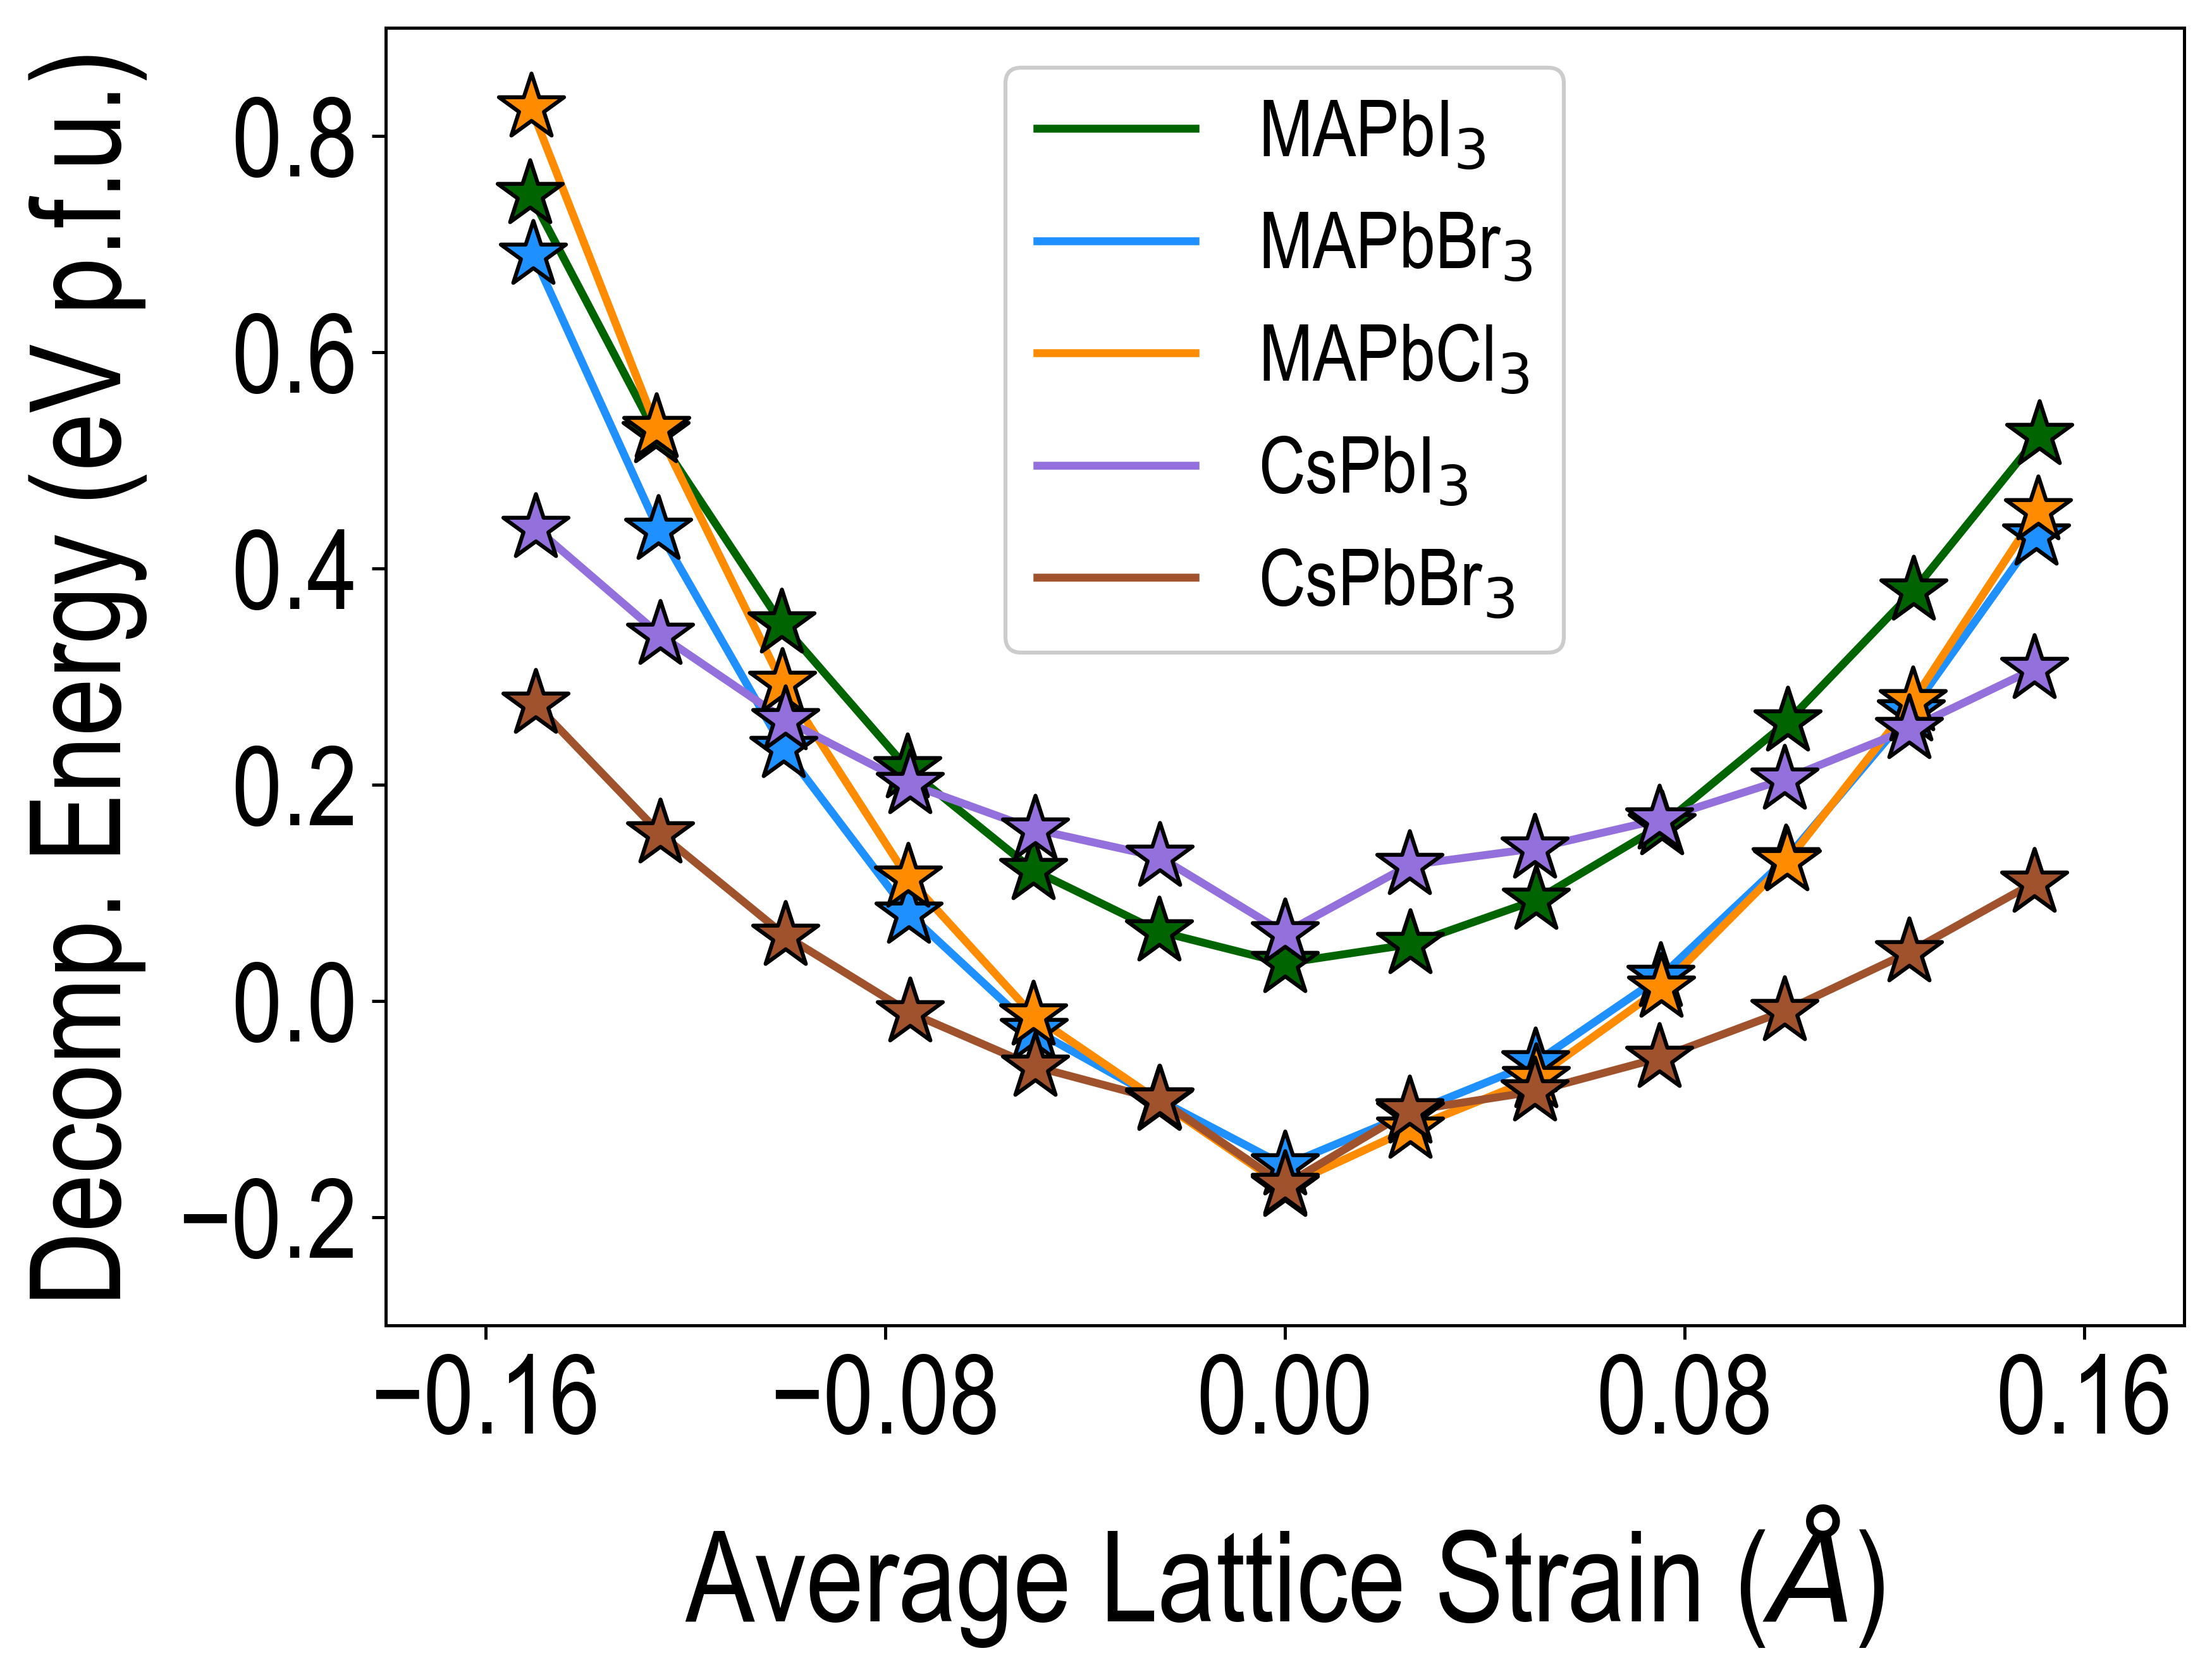

In [5]:
###    Lattice strain vs decomp    ###

Data = pd.read_excel('Compiled_data.xlsx', 'Latt_dist')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.18, bottom=0.20, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(Data.MAPI_dist[:], Data.MAPI_decomp[:], c='darkgreen', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPI_dist[:], Data.MAPI_decomp[:], ls='-', lw=2, c='darkgreen', label='MAPbI$_{3}$', zorder=1)

plt.scatter(Data.MAPBr_dist[:], Data.MAPBr_decomp[:], c='dodgerblue', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPBr_dist[:], Data.MAPBr_decomp[:], ls='-', lw=2, c='dodgerblue', label='MAPbBr$_{3}$', zorder=1)

plt.scatter(Data.MAPCl_dist[:], Data.MAPCl_decomp[:], c='darkorange', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.MAPCl_dist[:], Data.MAPCl_decomp[:], ls='-', lw=2, c='darkorange', label='MAPbCl$_{3}$', zorder=1)

plt.scatter(Data.CsPI_dist[:], Data.CsPI_decomp[:], c='mediumpurple', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.CsPI_dist[:], Data.CsPI_decomp[:], ls='-', lw=2, c='mediumpurple', label='CsPbI$_{3}$', zorder=1)

plt.scatter(Data.CsPBr_dist[:], Data.CsPBr_decomp[:], c='sienna', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.CsPBr_dist[:], Data.CsPBr_decomp[:], ls='-', lw=2, c='sienna', label='CsPbBr$_{3}$', zorder=1)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

plt.xlabel('Average Lattice Strain ($\AA$)', c='k', fontname='Arial Narrow', size=32, labelpad=12)
plt.ylabel('Decomp. Energy (eV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)

plt.xlim([-0.18, 0.18])
plt.ylim([-0.3, 0.9])
plt.xticks([-0.16, -0.08, 0, 0.08, 0.16])
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

plt.legend(loc='upper center', ncol=1, frameon=True, prop={'family':'Arial narrow','size':20}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_latt_strain_decomp.pdf', dpi=450)



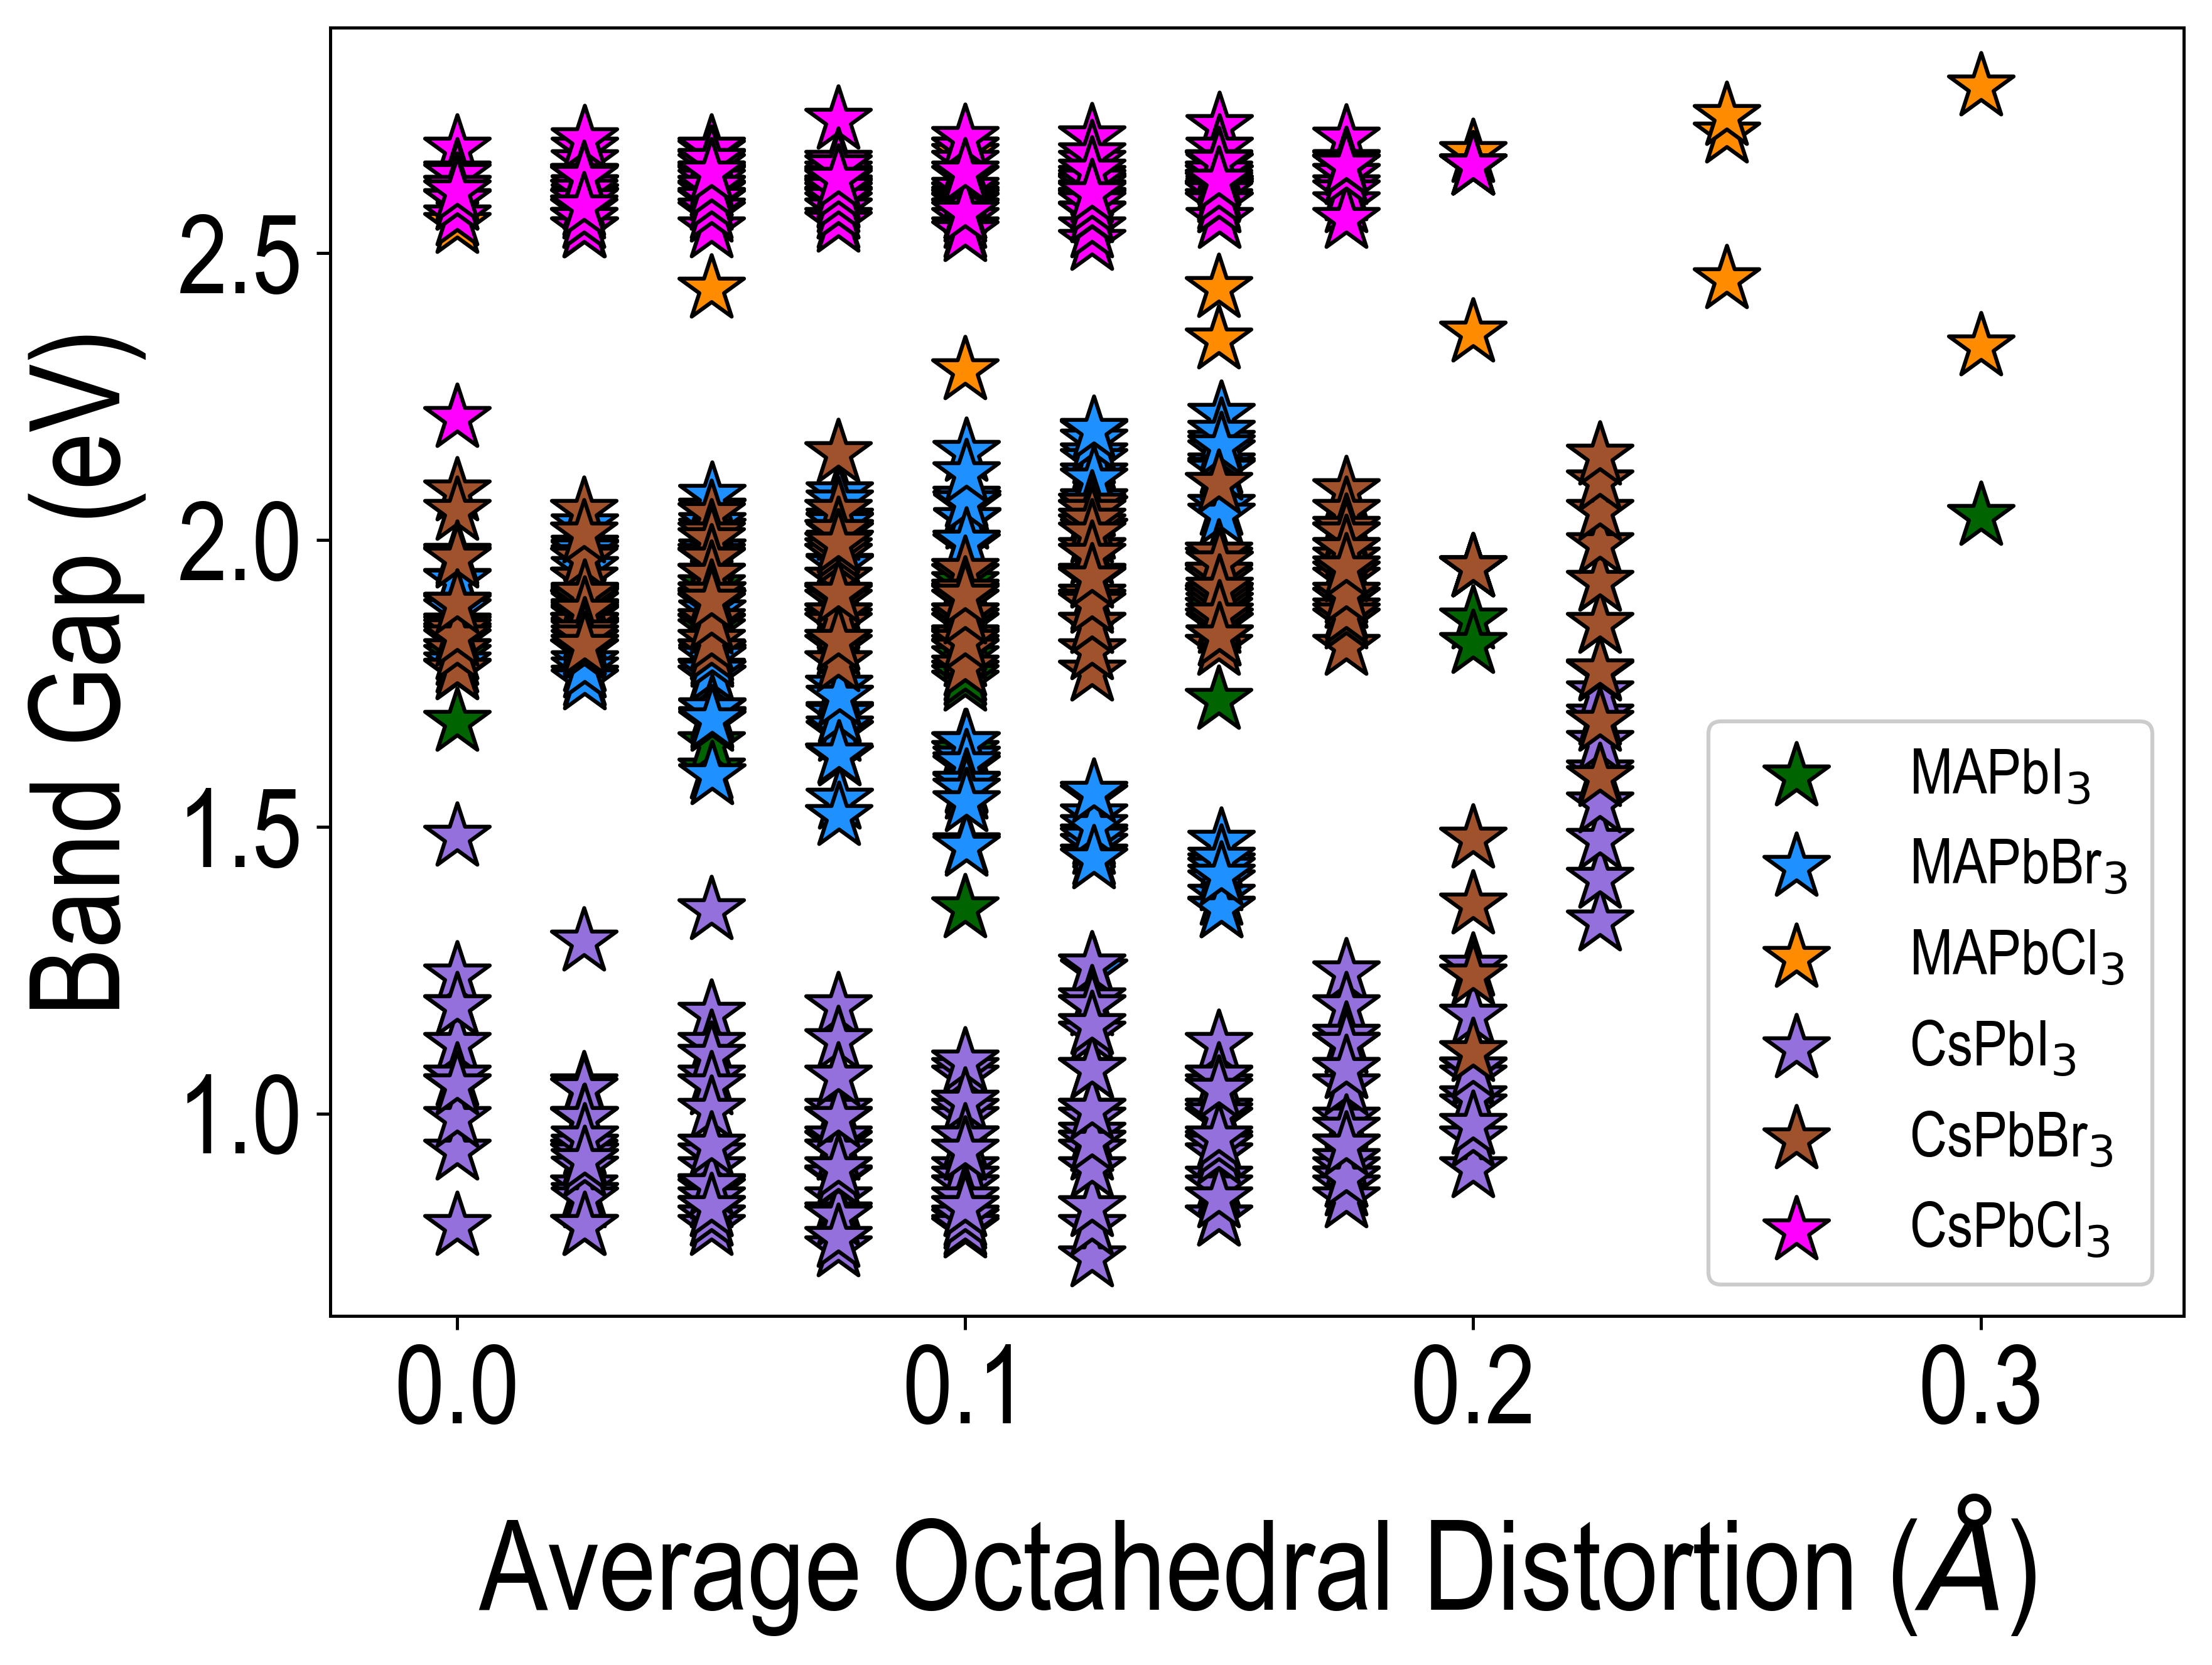

In [12]:
###    Oct distortion vs band gap    ###

Data = pd.read_excel('Compiled_data.xlsx', 'Oct_dist')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(np.abs(Data.MAPI_dist[0:28]), Data.MAPI_gap[0:28], c='darkgreen', alpha=1.0, marker='*', s=300, edgecolor='k', label='MAPbI$_{3}$', zorder=2)
plt.scatter(np.abs(Data.MAPBr_dist[0:130]), Data.MAPBr_gap[0:130], c='dodgerblue', alpha=1.0, marker='*', s=300, edgecolor='k', label='MAPbBr$_{3}$', zorder=2)
plt.scatter(np.abs(Data.MAPCl_dist[0:22]), Data.MAPCl_gap[0:22], c='darkorange', alpha=1.0, marker='*', s=300, edgecolor='k', label='MAPbCl$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPI_dist[0:170]), Data.CsPI_gap[0:170], c='mediumpurple', alpha=1.0, marker='*', s=300, edgecolor='k', label='CsPbI$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPBr_dist[0:170]), Data.CsPBr_gap[0:170], c='sienna', alpha=1.0, marker='*', s=300, edgecolor='k', label='CsPbBr$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPCl_dist[0:157]), Data.CsPCl_gap[0:157], c='magenta', alpha=1.0, marker='*', s=300, edgecolor='k', label='CsPbCl$_{3}$', zorder=2)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

#plt.xlabel('Mixing Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.xlabel('Average Octahedral Distortion ($\AA$)', c='k', fontname='Arial Narrow', size=32, labelpad=12)
plt.ylabel('Band Gap (eV)', c='k', fontname='Arial Narrow', size=32, labelpad=8)

plt.xlim([-0.025, 0.34])
#plt.ylim([0.7, 2.9])
#plt.xticks([-0.16, -0.08, 0, 0.08, 0.16])
#plt.yticks([1, 1.5, 2, 2.5])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

plt.legend(loc='lower right', ncol=1, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_oct_dist_gap.pdf', dpi=450)



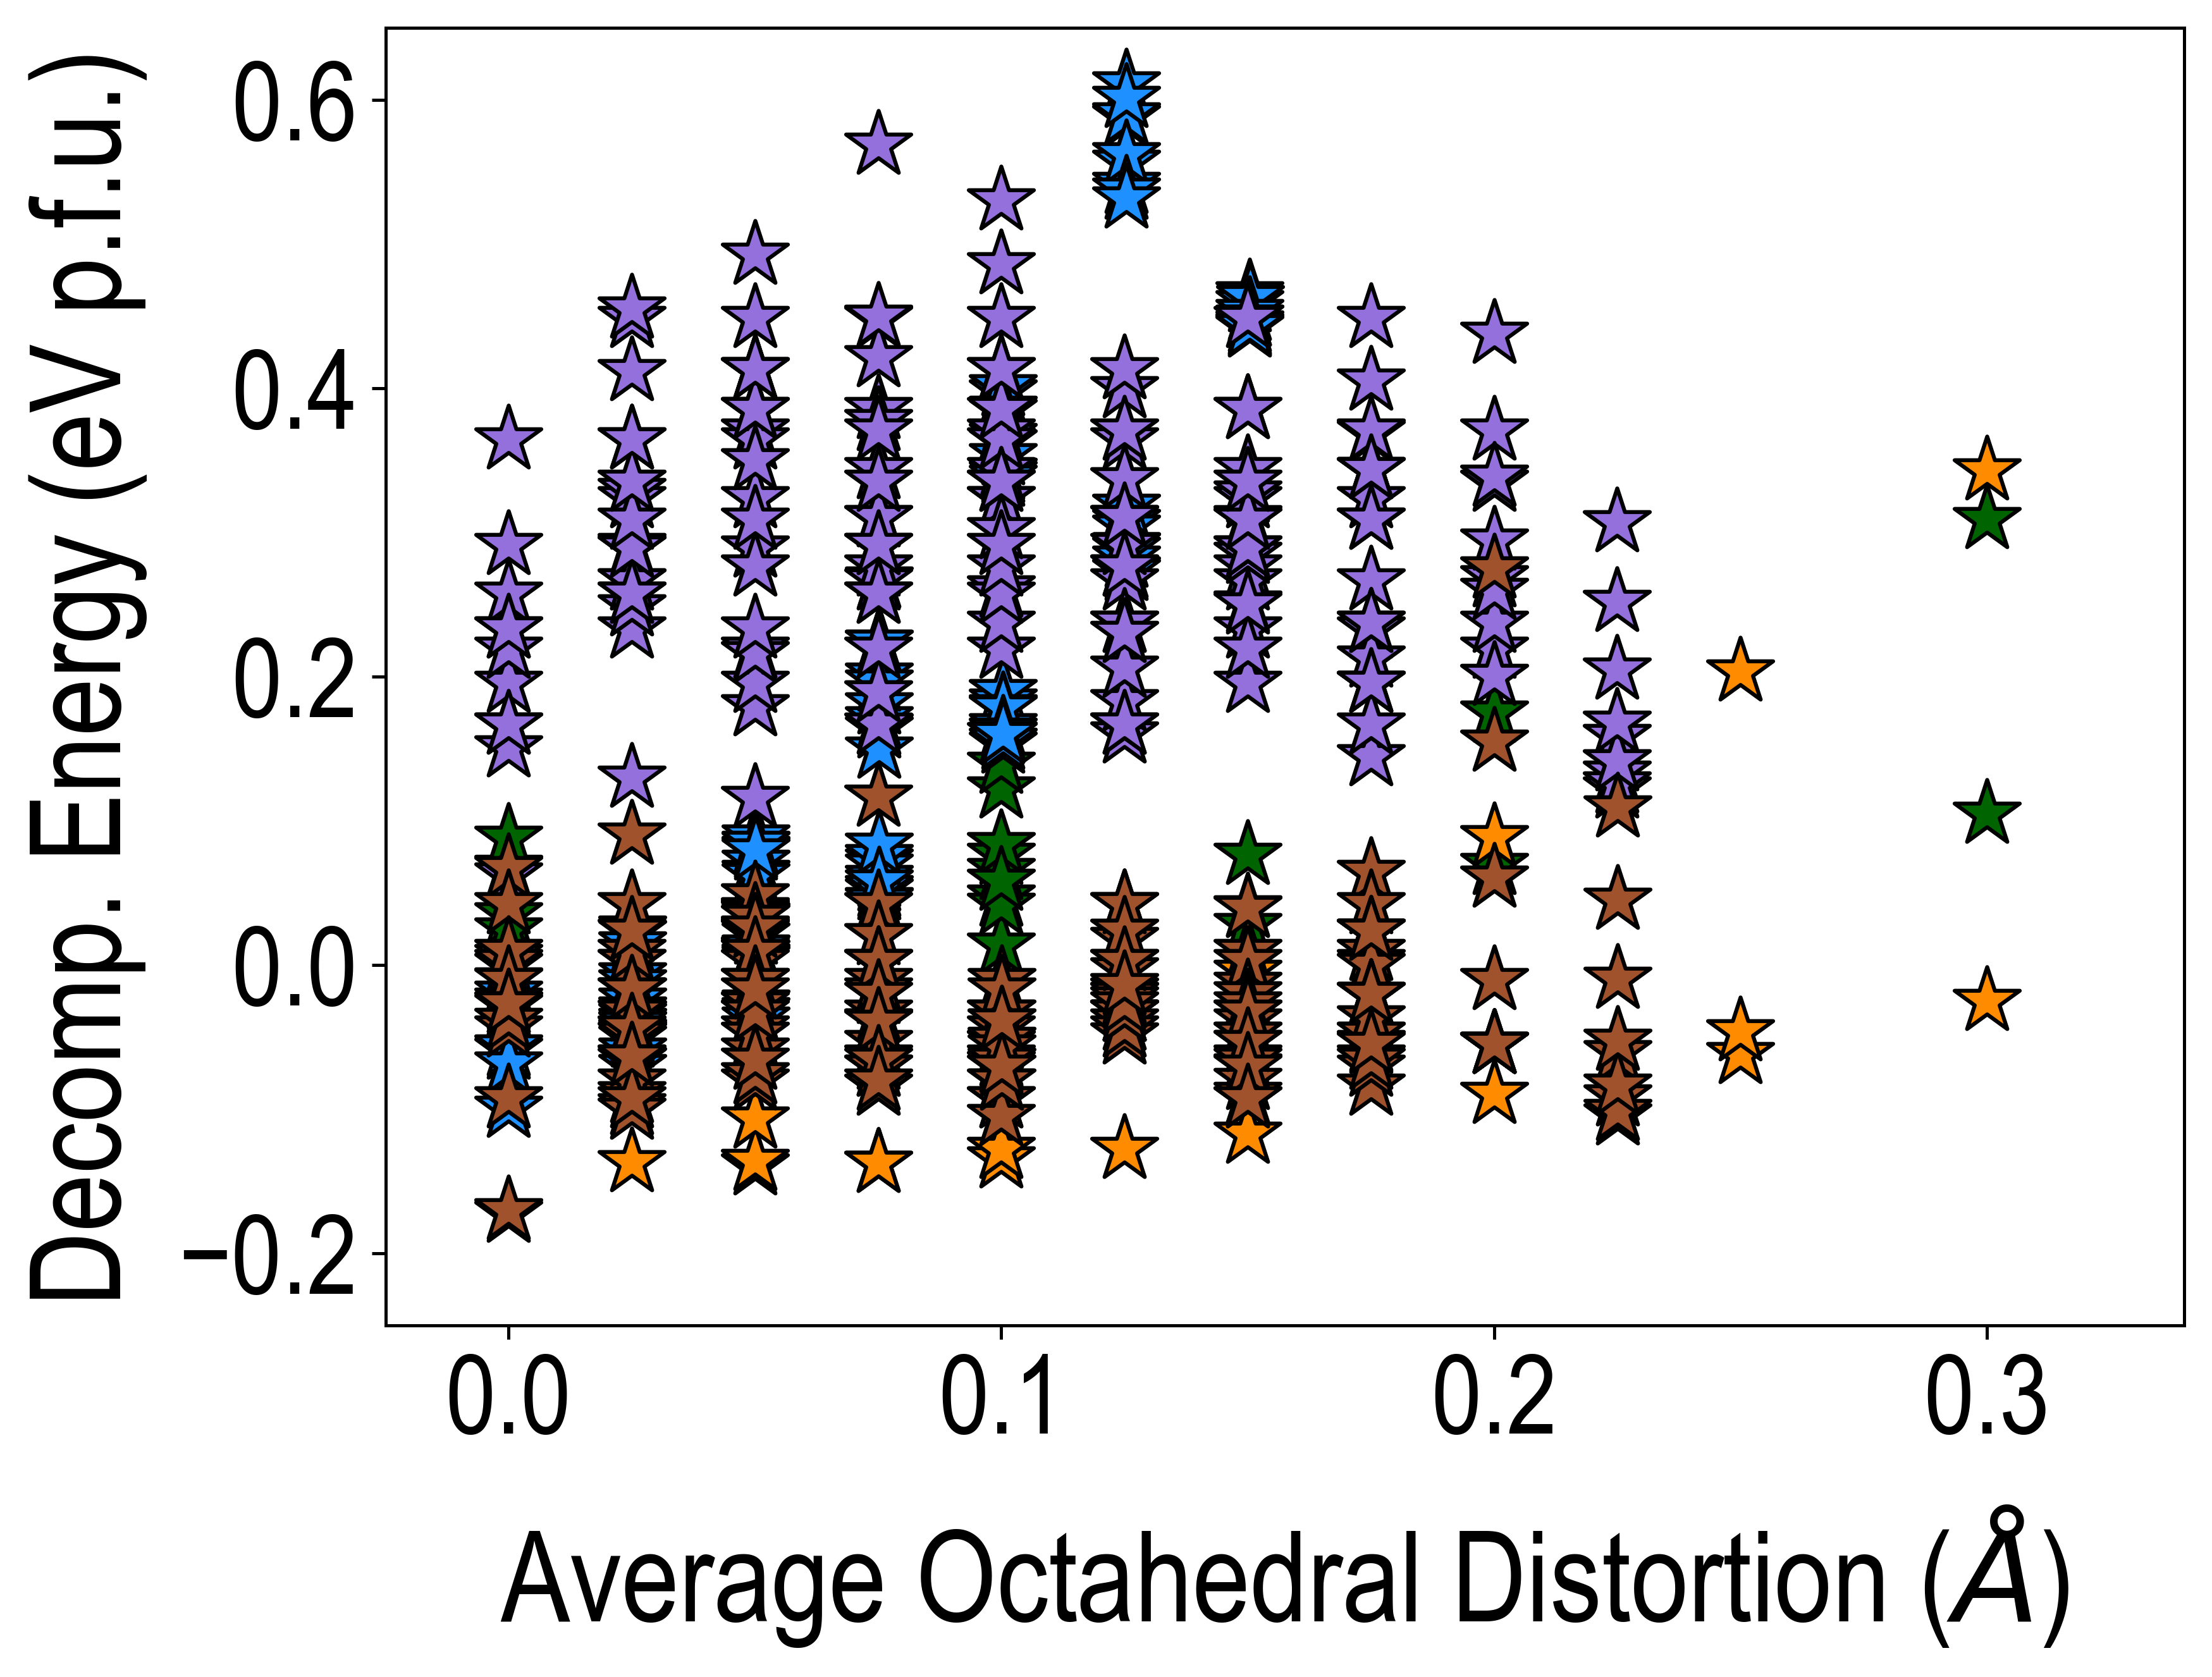

In [14]:
###    Oct distortion vs decomp    ###

Data = pd.read_excel('Compiled_data.xlsx', 'Oct_dist')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.18, bottom=0.20, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(np.abs(Data.MAPI_dist[0:28]), Data.MAPI_decomp[0:28], c='darkgreen', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbI$_{3}$', zorder=2)
plt.scatter(np.abs(Data.MAPBr_dist[0:130]), Data.MAPBr_decomp[0:130], c='dodgerblue', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbBr$_{3}$', zorder=2)
plt.scatter(np.abs(Data.MAPCl_dist[0:22]), Data.MAPCl_decomp[0:22], c='darkorange', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbCl$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPI_dist[0:170]), Data.CsPI_decomp[0:170], c='mediumpurple', alpha=1, marker='*', s=300, edgecolor='k', label='CsPbI$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPBr_dist[0:170]), Data.CsPBr_decomp[0:170], c='sienna', alpha=1, marker='*', s=300, edgecolor='k', label='CsPbBr$_{3}$', zorder=2)
plt.scatter(np.abs(Data.CsPCl_dist[0:157]), Data.CsPCl_decomp[0:157], c='magenta', alpha=1.0, marker='*', s=300, edgecolor='k', label='CsPbCl$_{3}$', zorder=2)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

#plt.xlabel('Mixing Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.xlabel('Average Octahedral Distortion ($\AA$)', c='k', fontname='Arial Narrow', size=32, labelpad=12)
plt.ylabel('Decomp. Energy (eV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)

plt.xlim([-0.025, 0.34])
plt.ylim([-0.25, 0.65])
#plt.xticks([-0.16, -0.08, 0, 0.08, 0.16])
#plt.yticks([1, 1.5, 2, 2.5])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

#plt.legend(loc='lower right', ncol=1, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_oct_dist_decomp.pdf', dpi=450)



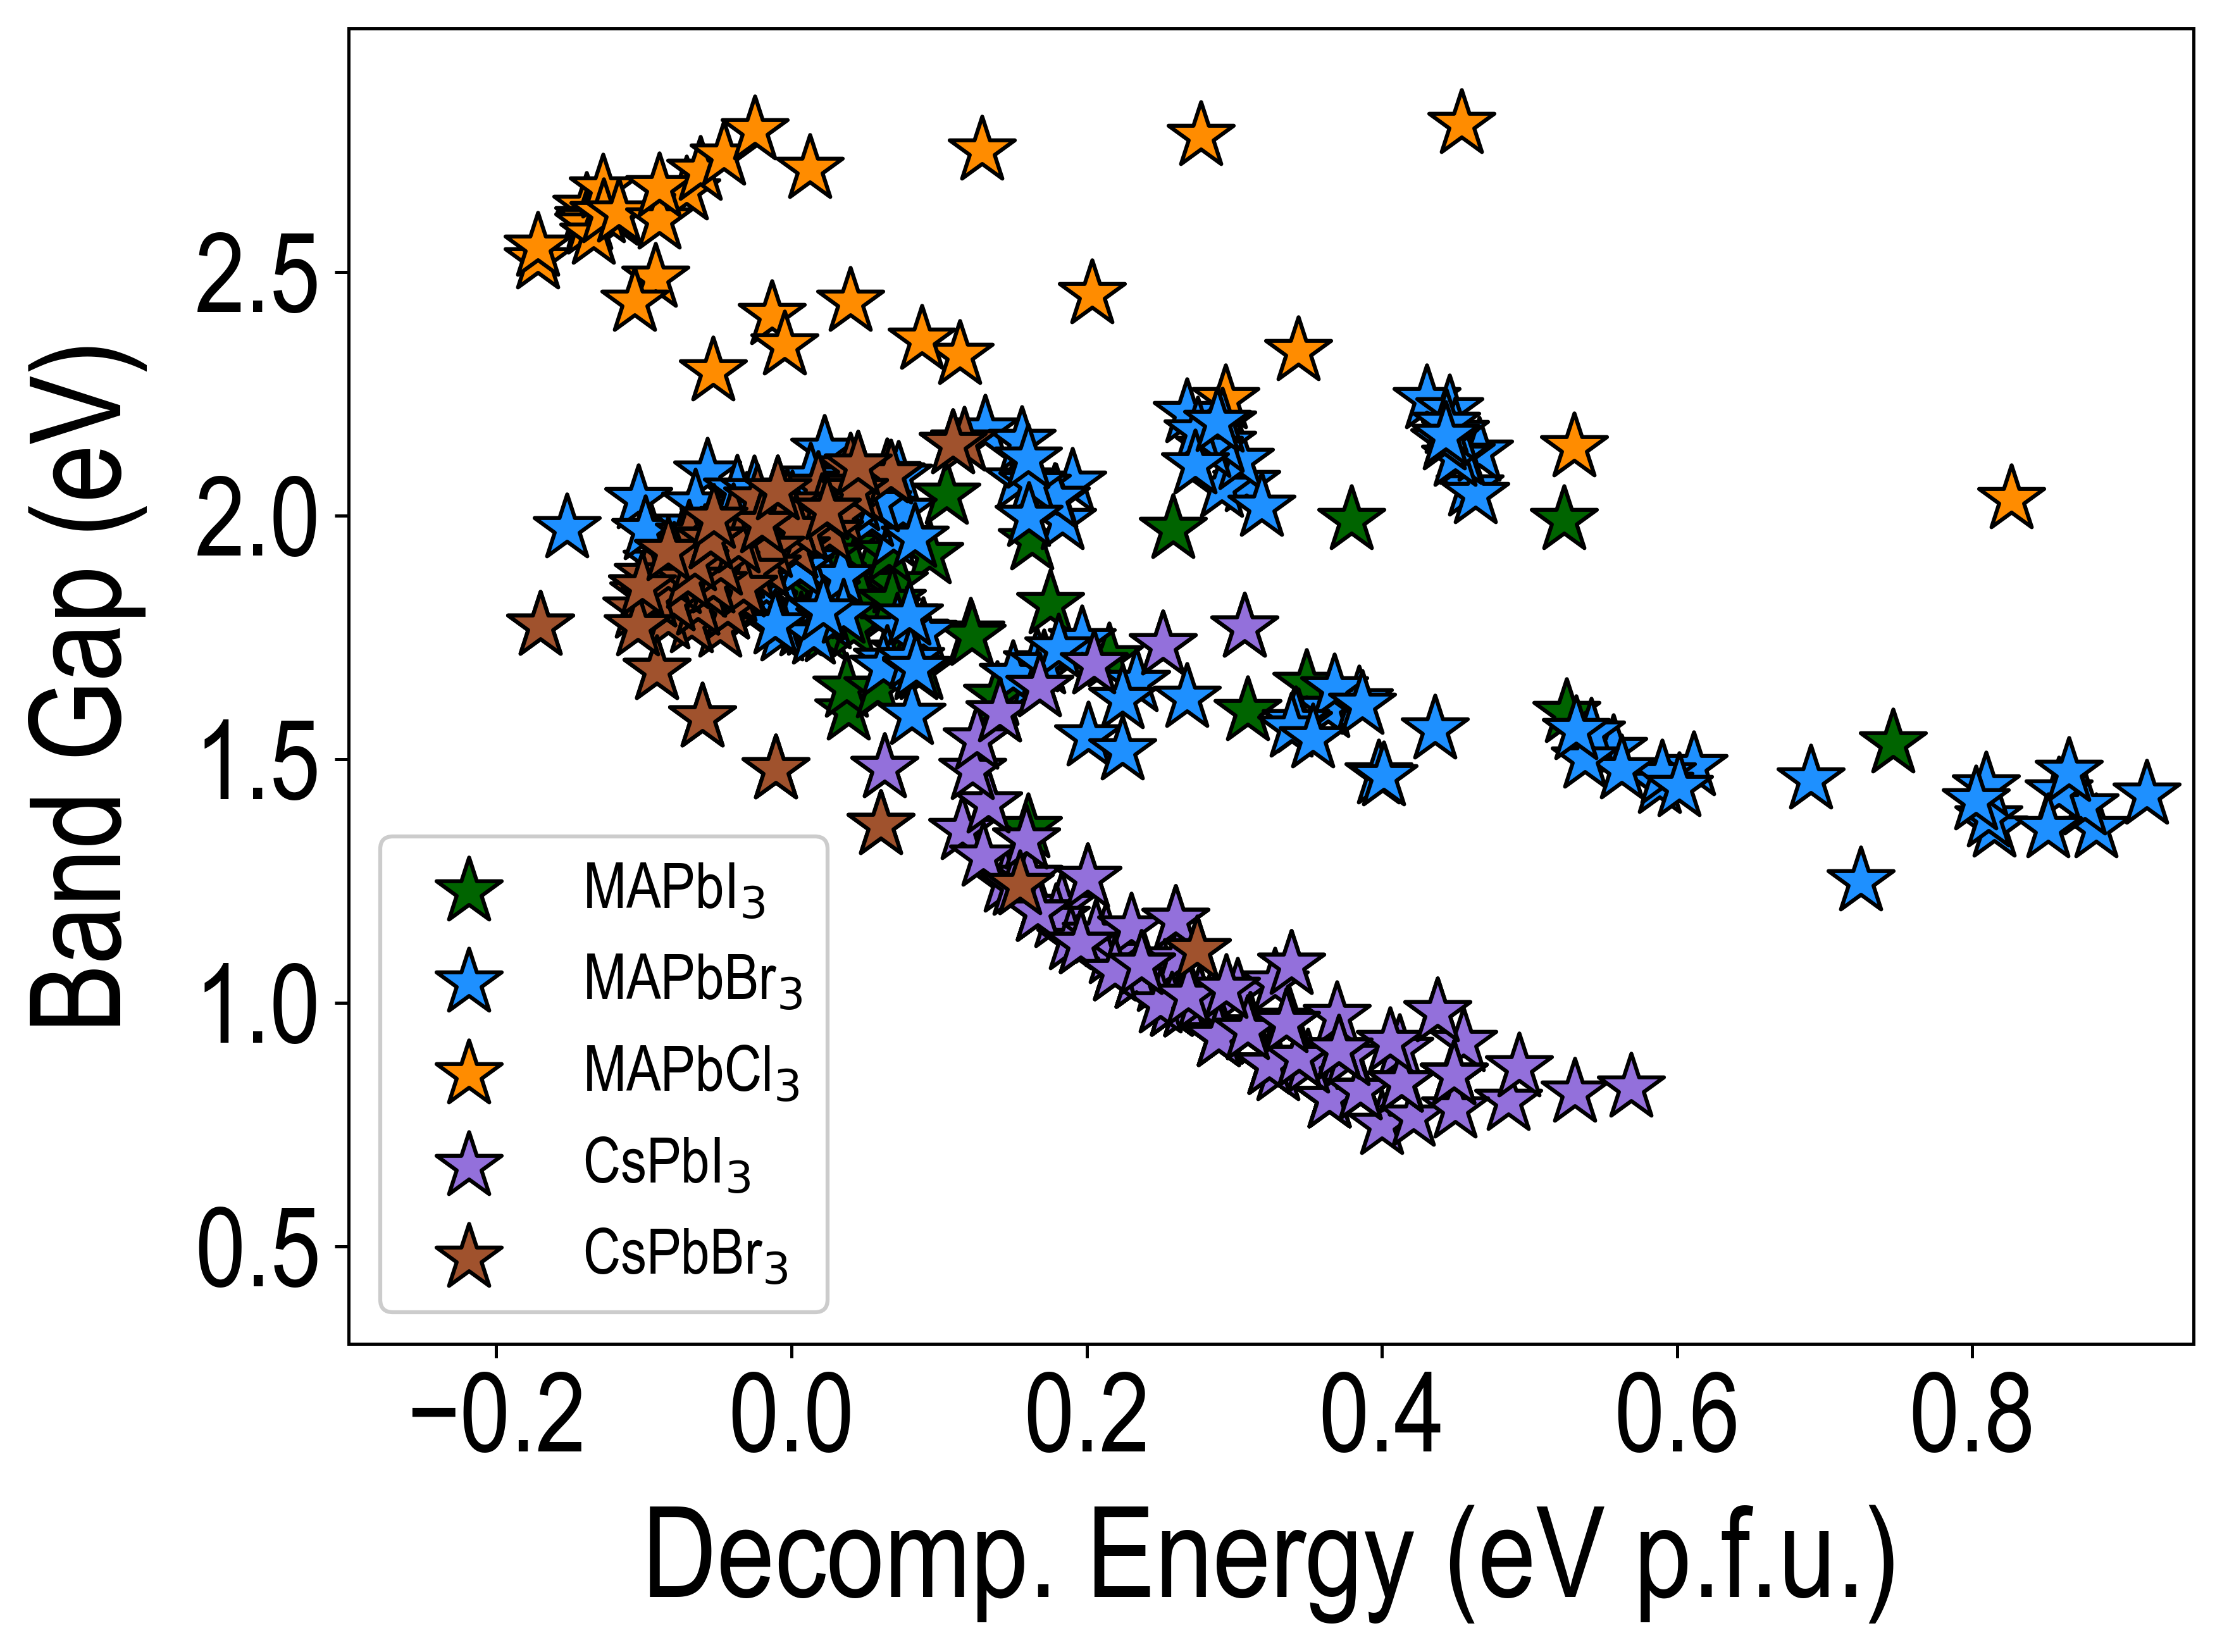

In [18]:
###    Oct distortion vs decomp    ###

Data_1 = pd.read_excel('Compiled_data.xlsx', 'Latt_dist')
Data_2 = pd.read_excel('Compiled_data.xlsx', 'Oct_dist')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.16, bottom=0.19, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(Data_1.MAPI_decomp[:], Data_1.MAPI_gap[:], c='darkgreen', alpha=1, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.scatter(Data_1.MAPBr_decomp[:], Data_1.MAPBr_gap[:], c='dodgerblue', alpha=1, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.scatter(Data_1.MAPCl_decomp[:], Data_1.MAPCl_gap[:], c='darkorange', alpha=1, marker='*', s=300, edgecolor='k', label='_nolegend_$', zorder=2)
plt.scatter(Data_1.CsPI_decomp[:], Data_1.CsPI_gap[:], c='mediumpurple', alpha=1, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.scatter(Data_1.CsPBr_decomp[:], Data_1.CsPBr_gap[:], c='sienna', alpha=1, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)

plt.scatter(Data_2.MAPI_decomp[0:28], Data_2.MAPI_gap[0:28], c='darkgreen', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbI$_{3}$', zorder=2)
plt.scatter(Data_2.MAPBr_decomp[0:130], Data_2.MAPBr_gap[0:130], c='dodgerblue', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbBr$_{3}$', zorder=2)
plt.scatter(Data_2.MAPCl_decomp[0:22], Data_2.MAPCl_gap[0:22], c='darkorange', alpha=1, marker='*', s=300, edgecolor='k', label='MAPbCl$_{3}$', zorder=2)
plt.scatter(Data_2.CsPI_decomp[0:170], Data_2.CsPI_gap[0:170], c='mediumpurple', alpha=1, marker='*', s=300, edgecolor='k', label='CsPbI$_{3}$', zorder=2)
plt.scatter(Data_2.CsPBr_decomp[0:170], Data_2.CsPBr_gap[0:170], c='sienna', alpha=1, marker='*', s=300, edgecolor='k', label='CsPbBr$_{3}$', zorder=2)
#plt.scatter(Data_2.CsPCl_decomp[0:157], Data_2.CsPCl_gap[0:157], c='magenta', alpha=1.0, marker='*', s=300, edgecolor='k', label='CsPbCl$_{3}$', zorder=2)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

plt.xlabel('Decomp. Energy (eV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.ylabel('Band Gap (eV)', c='k', fontname='Arial Narrow', size=32, labelpad=12)

plt.xlim([-0.3, 0.95])
plt.ylim([0.3, 3.0])
plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8])
plt.yticks([0.5, 1, 1.5, 2, 2.5])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

plt.legend(loc='lower left', ncol=1, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_all_strain.pdf', dpi=450)



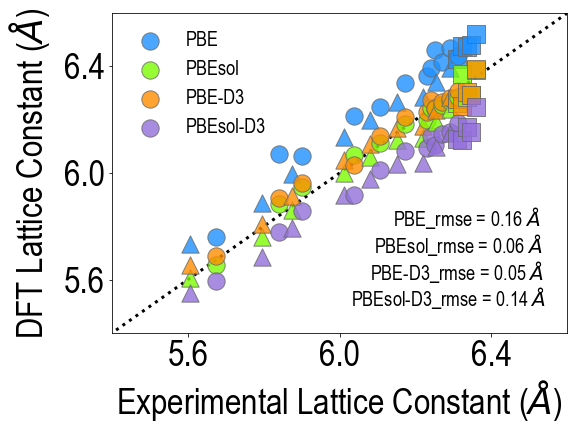

In [25]:
###   DFT vs Expt Lattice Constants   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Latt_const')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.18, bottom=0.21, right=0.97, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])

rmse_pbe = np.sqrt( sklearn.metrics.mean_squared_error(Data.Expt[:], Data.PBE[:]) )
t1 = '%.2f' % rmse_pbe
rmse_pbesol = np.sqrt( sklearn.metrics.mean_squared_error(Data.Expt[:], Data.PBEsol[:]) )
t2 = '%.2f' % rmse_pbesol
rmse_pbed3 = np.sqrt( sklearn.metrics.mean_squared_error(Data.Expt[:], Data.PBEd3[:]) )
t3 = '%.2f' % rmse_pbed3
rmse_pbesold3 = np.sqrt( sklearn.metrics.mean_squared_error(Data.Expt[:], Data.PBEsold3[:]) )
t4 = '%.2f' % rmse_pbesold3

for i in range(0,n):
    if Data.A[i] == 'MA':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
    if Data.A[i] == 'FA':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
    if Data.A[i] == 'Cs':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE-D3')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol-D3')

# plt.scatter(1000, 1000, marker='o', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='MA')
# plt.scatter(1000, 1000, marker='s', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='FA')
# plt.scatter(1000, 1000, marker='^', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='Cs')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':', lw=3, zorder=1)

plt.xlim([5.4, 6.6])
plt.ylim([5.4, 6.6])
plt.xticks([5.6, 6.0, 6.4], fontsize=36)
plt.yticks([5.6, 6.0, 6.4], fontsize=36)
#plt.xticks([6, 8, 10, 12], fontsize=36)
#plt.yticks([6, 8, 10, 12], fontsize=36)

plt.text(6.14, 5.8, 'PBE_rmse = ' + t1 + ' $\AA$', c='k', fontsize=20)
plt.text(6.09, 5.7, 'PBEsol_rmse = ' + t2 + ' $\AA$', c='k', fontsize=20)
plt.text(6.08, 5.6, 'PBE-D3_rmse = ' + t3 + ' $\AA$', c='k', fontsize=20)
plt.text(6.03, 5.5, 'PBEsol-D3_rmse = ' + t4 + ' $\AA$', c='k', fontsize=20)

plt.xlabel('Experimental Lattice Constant ($\AA$)', fontsize=36, labelpad=5)
plt.ylabel('DFT Lattice Constant ($\AA$)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft_latt.pdf', dpi=450)



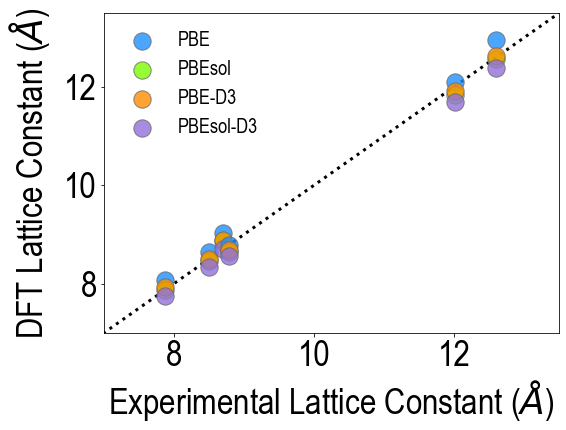

In [28]:
###   DFT vs Expt Lattice Constants   ###

Data = pd.read_excel('Compiled_data.xlsx', 'Latt_const')

fig = plt.figure( figsize=(8,6) )
plt.subplots_adjust(left=0.18, bottom=0.21, right=0.97, top=0.95)
plt.rc('font', family='Arial Narrow')

n = len(Data.Formula[:])

for i in range(0,n):
    if Data.A[i] == 'MA':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
    if Data.A[i] == 'FA':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='s', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
    if Data.A[i] == 'Cs':
        plt.scatter(Data.Expt[i], Data.PBE[i], c='dodgerblue', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsol[i], c='lawngreen', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEd3[i], c='darkorange', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)
        plt.scatter(Data.Expt[i], Data.PBEsold3[i], c='mediumpurple', marker='^', s=300, edgecolors='dimgrey', alpha=0.8, label='_nolabel_', zorder=2)

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBE-D3')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=300, edgecolors='dimgrey', alpha=0.8, label='PBEsol-D3')

# plt.scatter(1000, 1000, marker='o', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='MA')
# plt.scatter(1000, 1000, marker='s', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='FA')
# plt.scatter(1000, 1000, marker='^', facecolors='none', s=300, edgecolors='k', alpha=0.8, label='Cs')

a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':', lw=3, zorder=1)

plt.xlim([7, 13.5])
plt.ylim([7, 13.5])
plt.xticks([8, 10, 12], fontsize=36)
plt.yticks([8, 10, 12], fontsize=36)

plt.xlabel('Experimental Lattice Constant ($\AA$)', fontsize=36, labelpad=5)
plt.ylabel('DFT Lattice Constant ($\AA$)', fontsize=36, labelpad=12)
#plt.title('Band Gap (eV)', fontname='Arial Narrow', size=36, horizontalalignment='center', pad=20)
plt.legend(loc='upper left', ncol=1, frameon=False, prop={'family':'Arial Narrow','size':20})
plt.savefig('expt_vs_dft_latt_noncub.pdf', dpi=450)



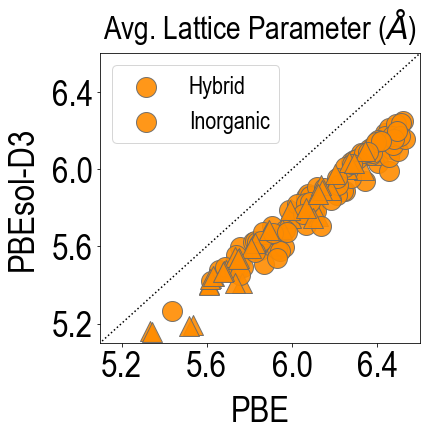

In [46]:
###   Visualize PBE vs PBEsol vs PBEd3 vs PBEsold3 Lattice Constants   ###

Data = pd.read_excel('Compiled_data.xlsx', 'All_latt_const')

n = len(Data.System[:])

fig = plt.figure( figsize=(6,6) )
plt.subplots_adjust(left=0.23, bottom=0.21, right=0.97, top=0.88)
plt.rc('font', family='Arial Narrow')


for i in range(0,n):

    if Data.A[i] == 'MA':
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesol[i], c='dodgerblue', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbed3[i], c='lawngreen', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
       plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesold3[i], c='darkorange', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if Data.A[i] == 'FA':
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesol[i], c='dodgerblue', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbed3[i], c='lawngreen', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesold3[i], c='darkorange', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

    if Data.A[i] == 'Cs':
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesol[i], c='dodgerblue', marker='^', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
#        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbed3[i], c='lawngreen', marker='^', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')
        plt.scatter(Data.latt_avg_pbe[i], Data.latt_avg_pbesold3[i], c='darkorange', marker='^', s=400, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

            
# plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='Hybrid')
# plt.scatter(1000, 1000, c='dodgerblue', marker='^', s=400, edgecolors='dimgrey', alpha=0.9, label='Inorganic')

# plt.scatter(1000, 1000, c='lawngreen', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='Hybrid')
# plt.scatter(1000, 1000, c='lawngreen', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='Inorganic')

plt.scatter(1000, 1000, c='darkorange', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='Hybrid')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=400, edgecolors='dimgrey', alpha=0.9, label='Inorganic')


a = [-500,0,500]
b = [-500,0,500]
plt.plot(b, a, c='k', ls=':')

plt.xlim([5.1, 6.6])
plt.ylim([5.1, 6.6])
plt.xticks([5.2, 5.6, 6.0, 6.4], fontsize=36)
plt.yticks([5.2, 5.6, 6.0, 6.4], fontsize=36)

# plt.xlim([4.5, 14.5])
# plt.ylim([4.5, 14.5])
# plt.xticks([6, 8, 10, 12, 14], fontsize=36)
# plt.yticks([6, 8, 10, 12, 14], fontsize=36)

plt.xlabel('PBE', fontsize=36, labelpad=12)
plt.ylabel('PBEsol-D3', fontsize=36, labelpad=12)
plt.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.title('Avg. Lattice Parameter ($\AA$)', fontname='Arial Narrow', size=32, horizontalalignment='center', pad=15)
plt.savefig('plot_latt_3.pdf', dpi=450)



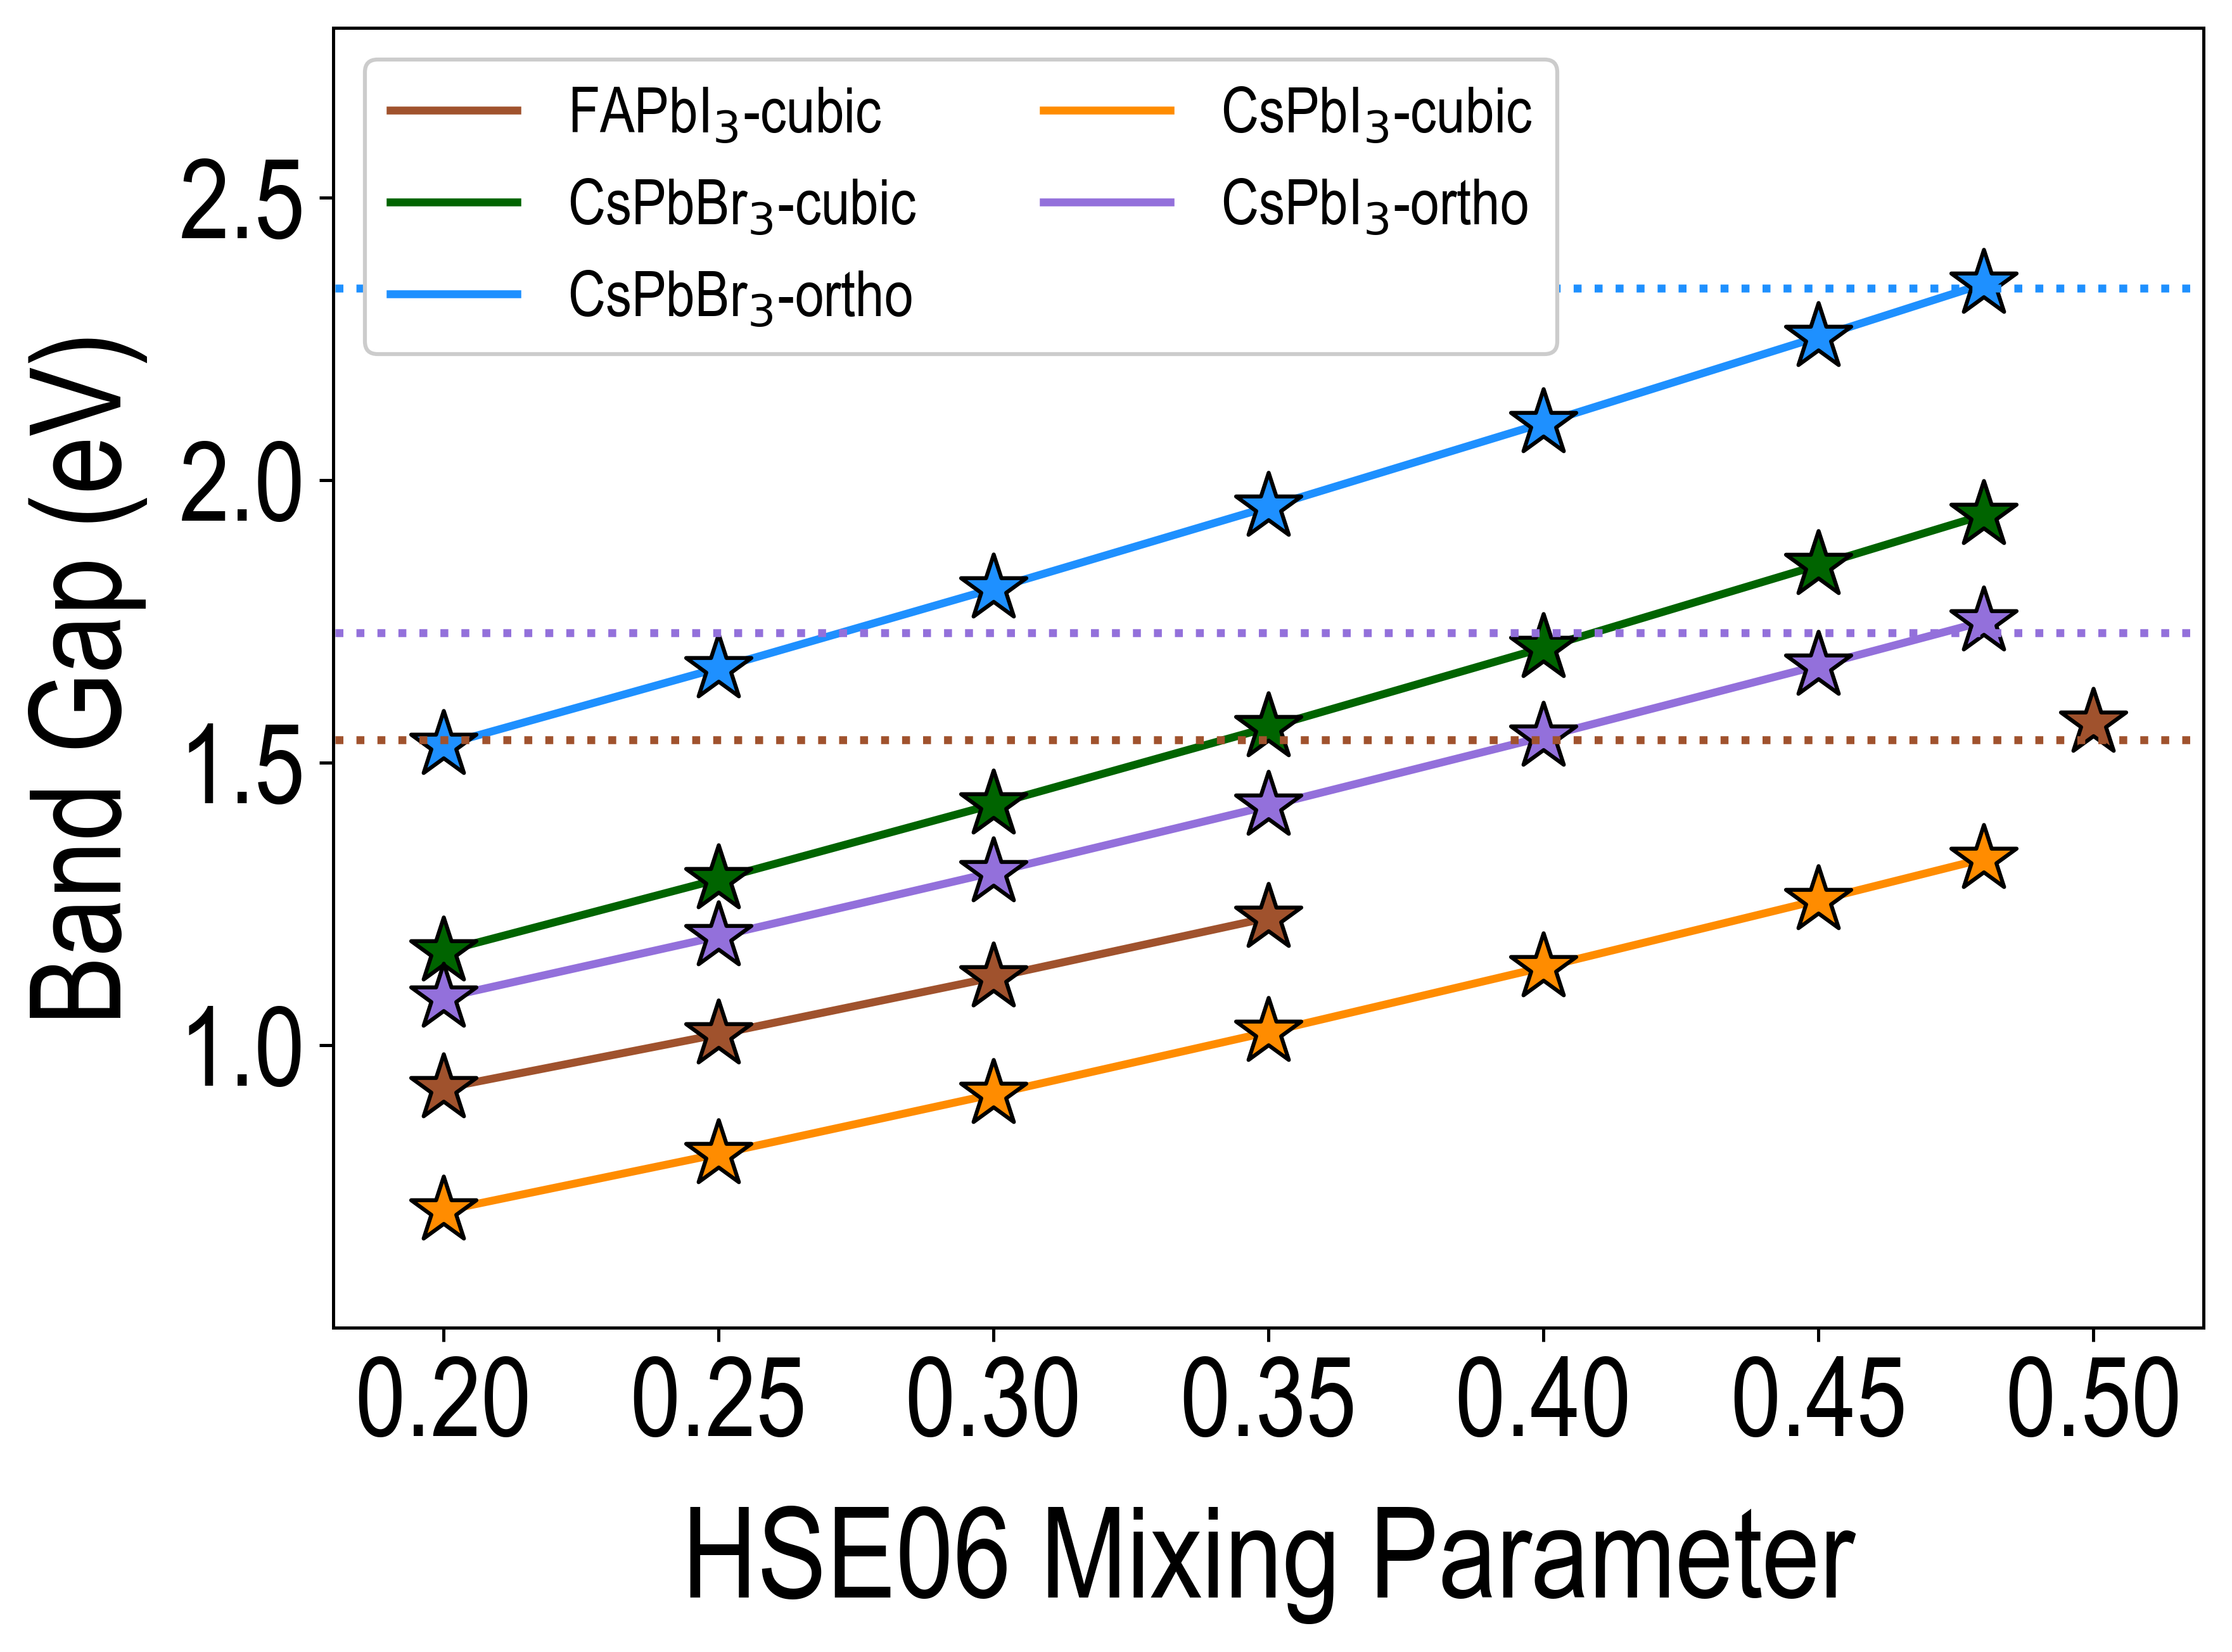

In [15]:
###    Lattice strain vs band gap    ###

Data = pd.read_excel('Compiled_data.xlsx', 'HSE_tuning')

fig = plt.subplots(figsize=(8,6),dpi=450)
#plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.15, bottom=0.20, right=0.97, top=0.96)
plt.rc('font', family='Arial narrow')

plt.scatter(Data.alpha[:], Data.Gap_FAPI_cub[:], c='sienna', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.alpha[:], Data.Gap_FAPI_cub[:], ls='-', lw=2, c='sienna', label='FAPbI$_{3}$-cubic', zorder=1)

plt.scatter(Data.alpha[:], Data.Gap_CsPbBr3_cub[:], c='darkgreen', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.alpha[:], Data.Gap_CsPbBr3_cub[:], ls='-', lw=2, c='darkgreen', label='CsPbBr$_{3}$-cubic', zorder=1)

plt.scatter(Data.alpha[:], Data.Gap_CsPbBr3_ort[:], c='dodgerblue', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.alpha[:], Data.Gap_CsPbBr3_ort[:], ls='-', lw=2, c='dodgerblue', label='CsPbBr$_{3}$-ortho', zorder=1)

plt.scatter(Data.alpha[:], Data.Gap_CsPbI3_cub[:], c='darkorange', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.alpha[:], Data.Gap_CsPbI3_cub[:], ls='-', lw=2, c='darkorange', label='CsPbI$_{3}$-cubic', zorder=1)

plt.scatter(Data.alpha[:], Data.Gap_CsPbI3_ort[:], c='mediumpurple', alpha=1.0, marker='*', s=300, edgecolor='k', label='_nolegend_', zorder=2)
plt.plot(Data.alpha[:], Data.Gap_CsPbI3_ort[:], ls='-', lw=2, c='mediumpurple', label='CsPbI$_{3}$-ortho', zorder=1)


expt_gap_CsPbI3_ort = 1.73
expt_gap_CsPbBr3_ort = 2.34
expt_gap_FAPbI3_cub = 1.54

a = [-1000, 0, 1000]
b = [expt_gap_CsPbI3_ort, expt_gap_CsPbI3_ort, expt_gap_CsPbI3_ort]
c = [expt_gap_CsPbBr3_ort, expt_gap_CsPbBr3_ort, expt_gap_CsPbBr3_ort]
d = [expt_gap_FAPbI3_cub, expt_gap_FAPbI3_cub, expt_gap_FAPbI3_cub]
plt.plot(a, b, c='mediumpurple', ls=':', lw=2, label='_nolegend_')
plt.plot(a, c, c='dodgerblue', ls=':', lw=2, label='_nolegend_')
plt.plot(a, d, c='sienna', ls=':', lw=2, label='_nolegend_')


plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)

#plt.xlabel('Mixing Energy (meV p.f.u.)', c='k', fontname='Arial Narrow', size=32, labelpad=8)
plt.xlabel('HSE06 Mixing Parameter', c='k', fontname='Arial Narrow', size=32, labelpad=12)
plt.ylabel('Band Gap (eV)', c='k', fontname='Arial Narrow', size=32, labelpad=8)

plt.xlim([0.18, 0.52])
plt.ylim([0.5, 2.8])
plt.xticks([0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.yticks([1, 1.5, 2, 2.5])

#plt.legend(loc='upper center', ncol=3, frameon=True, prop={'family':'Arial narrow','size':16})

plt.legend(loc='upper left', ncol=2, frameon=True, prop={'family':'Arial narrow','size':16}, facecolor='white', framealpha=1)
#plt.legend(bbox_to_anchor=(0.6, 0.7), ncol=1, frameon=True, prop={'family':'Arial narrow','size':12}, facecolor='white', framealpha=1)

plt.savefig('plot_hse_tuning.pdf', dpi=450)

